# Getting started with Sample-based quantum diagonalization (SQD)

<details>
<summary><b>Package versions</b></summary>

The code on this page was developed using the following requirements.
We recommend using these versions or newer.

```
qiskit-addon-sqd~=0.10.0
pyscf~=2.8.0; sys.platform != 'win32'
```
</details>

<Admonition type="caution" title="Note for Windows users">

This example uses the `pyscf` package, a Python-based chemistry simulation library, which is not natively supported on Windows; therefore, the examples below will not work.

In order to execute the code snippets below, Windows users need to create a Python environment using the Windows Subsystem for Linux, as suggested in the [`pyscf` install guide.](https://pyscf.org/install.html)

</Admonition>

This guide demonstrates a simple working example to get started with the `qiskit-addons-sqd` package. In this example, you can use SQD to obtain an approximation of the ground state of the $N_2$ molecule at equilibrium.

To begin, recall that the generic interacting-electron Hamiltonian has the form:

$$ \hat{H} = \sum_{\substack{pr\\ \sigma}}h_{pr} \hat{a}_{p\sigma}^\dagger \hat{a}_{r\sigma} + \sum_{\substack{prqs\\ \sigma\tau}} \frac{1}{2}\left(pr|qs\right)\hat{a}_{p\sigma}^\dagger \hat{a}_{q\tau}^\dagger \hat{a}_{s\tau}\hat{a}_{r\sigma} $$

where $\hat{a}_{p\sigma}^\dagger$ and $\hat{a}_{p\sigma}$ are the Fermionic creation and annihilation operators associated with the $p$-th orbital with spin $\sigma$ and $h_{pr}$ and $\left(pr|qs\right)$ are the one and two-body electronic integrals.

## Prepare molecule information

To begin, specify the molecule and its properties using `pyscf` and the electronic integrals stored in `n2_fci.txt`.

<Admonition type = "note">
This example ingests pre-generated data in a file called `n2_fci.txt`, which contains one- and two-body electronic integrals. To run the code cells below on a local machine, copy and paste the data into a file with the same name. This example also requires the `pyscf` package to be installed.
</Admonition>

<details>
<summary>
Click here to examine the orbital information used to generate the ansatz.

</summary>

```
&FCI NORB=  16,NELEC=10,MS2=0,
  ORBSYM=1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
  ISYM=1,
 &END
 0.8227153295684669    1    1    1    1
 0.05187587577524144    2    1    2    1
 0.5219201962559413    2    2    1    1
 0.535263084520174    2    2    2    2
 -0.1347836972470542    3    1    1    1
 -0.008657841512417053    3    1    2    2
 0.05793493716089329    3    1    3    1
 0.08632998383785331    3    2    2    1
 0.2097929322213681    3    2    3    2
 0.5579235002150018    3    3    1    1
 0.5400470008931167    3    3    2    2
 -0.03025371939317356    3    3    3    1
 0.5605460154373538    3    3    3    3
 0.09174878837664172    4    1    4    1
 0.04723726824560959    4    2    4    2
 0.01793854091372141    4    3    4    1
 0.02777111434804593    4    3    4    3
 0.6167116434966806    4    4    1    1
 0.4950011142931046    4    4    2    2
 -0.05120347206217244    4    4    3    1
 0.4994721784892377    4    4    3    3
 0.5574513568785978    4    4    4    4
 0.09174878837664172    5    1    5    1
 0.04723726824560959    5    2    5    2
 0.01793854091372141    5    3    5    1
 0.02777111434804593    5    3    5    3
 0.02173144186568365    5    4    5    4
 0.6167116434966806    5    5    1    1
 0.4950011142931046    5    5    2    2
 -0.05120347206217243    5    5    3    1
 0.4994721784892377    5    5    3    3
 0.5139884731472305    5    5    4    4
 0.5574513568785978    5    5    5    5
 -0.03561566048469387    6    1    5    2
 0.03274533140789082    6    1    6    1
 -0.06326282529165393    6    2    5    1
 -0.03802750942520941    6    2    5    3
 0.07187262411478063    6    2    6    2
 -0.03634033716578009    6    3    5    2
 0.02129640076005778    6    3    6    1
 0.03508481685867926    6    3    6    3
 0.01461681127204733    6    4    6    4
 -0.08239995604786524    6    5    2    1
 -0.1408740357900443    6    5    3    2
 0.1491913500304486    6    5    6    5
 0.5357098613594921    6    6    1    1
 0.4797794886355124    6    6    2    2
 -0.02657196082195435    6    6    3    1
 0.4797443654275239    6    6    3    3
 0.4715924627481501    6    6    4    4
 0.5081607966085441    6    6    5    5
 0.4820906746005189    6    6    6    6
 -0.0356156604846939    7    1    4    2
 0.03274533140789088    7    1    7    1
 -0.06326282529165396    7    2    4    1
 -0.03802750942520942    7    2    4    3
 0.07187262411478068    7    2    7    2
 -0.0363403371657801    7    3    4    2
 0.02129640076005779    7    3    7    1
 0.03508481685867928    7    3    7    3
 -0.08239995604786529    7    4    2    1
 -0.1408740357900444    7    4    3    2
 0.1199577274863541    7    4    6    5
 0.1491913500304488    7    4    7    4
 0.01461681127204733    7    5    6    4
 0.01461681127204734    7    5    7    5
 0.01828416693019705    7    6    5    4
 0.01825888562015071    7    6    7    6
 0.5357098613594925    7    7    1    1
 0.4797794886355127    7    7    2    2
 -0.02657196082195444    7    7    3    1
 0.4797443654275243    7    7    3    3
 0.5081607966085445    7    7    4    4
 0.4715924627481504    7    7    5    5
 0.4455729033602178    7    7    6    6
 0.4820906746005196    7    7    7    7
 -0.03524297684128183    8    1    2    1
 -0.04074732313525206    8    1    3    2
 0.05461805447735864    8    1    6    5
 0.0546180544773587    8    1    7    4
 0.03139253594027781    8    1    8    1
 -0.09902456594727965    8    2    1    1
 -0.04661452206194711    8    2    2    2
 0.01745134735859632    8    2    3    1
 -0.0434285157352537    8    2    3    3
 -0.07441150662198262    8    2    4    4
 -0.07441150662198263    8    2    5    5
 -0.05756619827574588    8    2    6    6
 -0.05756619827574614    8    2    7    7
 0.03454616823267013    8    2    8    2
 0.01020038606708412    8    3    2    1
 0.03390671413208901    8    3    3    2
 -0.01685771610674289    8    3    6    5
 -0.01685771610674282    8    3    7    4
 -0.001758941272080179    8    3    8    1
 -1.454253424481812e-15    8    3    8    2
 0.02574499145622101    8    3    8    3
 -0.02077063701641325    8    4    4    2
 0.02061769217890737    8    4    7    1
 0.009719515085149335    8    4    7    3
 0.01542975405064832    8    4    8    4
 -0.02077063701641325    8    5    5    2
 0.02061769217890735    8    5    6    1
 0.009719515085149337    8    5    6    3
 0.01542975405064834    8    5    8    5
 0.03382971287644416    8    6    5    1
 0.006981782449266088    8    6    5    3
 -0.02290667301698743    8    6    6    2
 0.01920341543530237    8    6    8    6
 0.0338297128764442    8    7    4    1
 0.006981782449266106    8    7    4    3
 -0.02290667301698751    8    7    7    2
 0.0192034154353025    8    7    8    7
 0.3849906228031625    8    8    1    1
 1.532139515234422e-15    8    8    2    1
 0.3739434384087874    8    8    2    2
 -0.01189244298406278    8    8    3    1
 -1.70487262919109e-15    8    8    3    2
 0.3806281806388789    8    8    3    3
 0.3592472833223549    8    8    4    4
 0.3592472833223548    8    8    5    5
 0.3518218572933207    8    8    6    6
 0.3518218572933239    8    8    7    7
 -9.213014454321943e-15    8    8    8    1
 -0.002559575988447579    8    8    8    2
 2.582877514276093e-15    8    8    8    3
 0.3533280612079513    8    8    8    8
 -0.08437056478993962    9    1    1    1
 -0.02483152558294141    9    1    2    2
 0.03508237116075699    9    1    3    1
 -0.04238233132830437    9    1    3    3
 -0.03130903659562344    9    1    4    4
 -0.03130903659562344    9    1    5    5
 -0.0247567692246128    9    1    6    6
 -0.0247567692246129    9    1    7    7
 0.006664526188246471    9    1    8    2
 -0.0187004290474871    9    1    8    8
 0.03411063970385471    9    1    9    1
 -0.000324543222555269    9    2    2    1
 -0.009544290122943031    9    2    3    2
 0.0005846207771048886    9    2    6    5
 0.0005846207771048843    9    2    7    4
 -0.004225446575758229    9    2    8    1
 -0.0160233903830305    9    2    8    3
 -1.296223756241197e-15    9    2    8    8
 0.01252498165364666    9    2    9    2
 0.1150822839777867    9    3    1    1
 0.04437457961389323    9    3    2    2
 -0.03205451729612252    9    3    3    1
 0.05345664062548897    9    3    3    3
 0.07018063195288905    9    3    4    4
 0.07018063195288905    9    3    5    5
 0.05161063877667307    9    3    6    6
 0.05161063877667314    9    3    7    7
 -0.03084929147706867    9    3    8    2
 0.003453484898978239    9    3    8    8
 -0.01908776834443358    9    3    9    1
 0.0376521330958023    9    3    9    3
 0.02105492525439208    9    4    4    1
 0.009612956934137195    9    4    4    3
 -0.0170208385670036    9    4    7    2
 0.0101644211871623    9    4    8    7
 0.01781400513488478    9    4    9    4
 0.02105492525439208    9    5    5    1
 0.009612956934137199    9    5    5    3
 -0.0170208385670036    9    5    6    2
 0.01016442118716232    9    5    8    6
 0.01781400513488478    9    5    9    5
 -0.002498627753198275    9    6    5    2
 0.00165309872168953    9    6    6    1
 0.0008160296419366277    9    6    6    3
 0.004146388883456698    9    6    8    5
 0.006081954311234169    9    6    9    6
 -0.002498627753198287    9    7    4    2
 0.001653098721689535    9    7    7    1
 0.0008160296419366425    9    7    7    3
 0.004146388883456699    9    7    8    4
 0.006081954311234147    9    7    9    7
 -0.02886065392650743    9    8    2    1
 -0.08059579771897678    9    8    3    2
 0.05013528703473159    9    8    6    5
 0.05013528703473144    9    8    7    4
 0.00512605536727401    9    8    8    1
 -0.03791888034075609    9    8    8    3
 1.79921551363938e-15    9    8    8    8
 0.0223703801094375    9    8    9    2
 0.07999279914080047    9    8    9    8
 0.4512983231568335    9    9    1    1
 0.3840689338373527    9    9    2    2
 -0.03229840501917277    9    9    3    1
 0.3951272309006291    9    9    3    3
 0.4007276788093279    9    9    4    4
 0.4007276788093278    9    9    5    5
 0.3756829401859137    9    9    6    6
 0.3756829401859138    9    9    7    7
 -0.02463475509719546    9    9    8    2
 0.3350906948054849    9    9    8    8
 -0.01899282782297876    9    9    9    1
 0.0301941885483401    9    9    9    3
 0.357505673937019    9    9    9    9
 0.03002688675915308   10    1    4    1
 0.0005995709470891994   10    1    4    3
 -0.0172438543749579   10    1    7    2
 0.01291169677940597   10    1    8    7
 -0.003259507299477913   10    1    9    4
 0.02102579188104308   10    1   10    1
 0.01645536769518047   10    2    4    2
 -0.01311940331444267   10    2    7    1
 -0.009565545339108458   10    2    7    3
 -0.01007660992560598   10    2    8    4
 -0.001949322189805196   10    2    9    7
 0.0150687251098785   10    2   10    2
 -0.00782040018913332   10    3    4    1
 0.005781477858077181   10    3    4    3
 -0.001699410038954856   10    3    7    2
 0.001405760196545938   10    3    8    7
 -0.001632221494911969   10    3    9    4
 0.001484050816561781   10    3   10    1
 0.011469849615765   10    3   10    3
 0.1449696637125928   10    4    1    1
 0.09695275968073921   10    4    2    2
 -0.02683904819641667   10    4    3    1
 0.1040182545591939   10    4    3    3
 0.1054748177652819   10    4    4    4
 0.09906461632725239   10    4    5    5
 0.08547188003399001   10    4    6    6
 0.09092939778596297   10    4    7    7
 -0.02924953767671292   10    4    8    2
 0.04394828485485928   10    4    8    8
 -0.02947686995983997   10    4    9    1
 0.03114857713688626   10    4    9    3
 0.04298462169731809   10    4    9    9
 0.07359191071476424   10    4   10    4
 0.003205100719014754   10    5    5    4
 0.002728758875986386   10    5    7    6
 0.008191070656016116   10    5   10    5
 0.003740916537628832   10    6    6    4
 0.003740916537628842   10    6    7    5
 0.006733892595476496   10    6   10    6
 -0.03175412552065111   10    7    2    1
 -0.04419991710849876   10    7    3    2
 0.04413705154502855   10    7    6    5
 0.05161888462028632   10    7    7    4
 0.02799596056973121   10    7    8    1
 0.003753276611977636   10    7    8    3
 1.440315974143754e-15   10    7    8    8
 -0.007265518703405046   10    7    9    2
 -0.006288168906483342   10    7    9    8
 0.0512691171069093   10    7   10    7
 -0.01432355064897697   10    8    4    2
 0.01266500684362559   10    8    7    1
 0.009476848815356763   10    8    7    3
 0.00610087739275617   10    8    8    4
 -0.003319323720434755   10    8    9    7
 -0.006527882109888947   10    8   10    2
 0.008819030357028728   10    8   10    8
 -0.0277610868460422   10    9    4    1
 -0.002712441545701519   10    9    4    3
 0.01407969203382054   10    9    7    2
 -0.01213075044001345   10    9    8    7
 -0.0153864513142966   10    9    9    4
 -0.001978189261451786   10    9   10    1
 0.007699118725409356   10    9   10    3
 0.02254152233110553   10    9   10    9
 0.4998988132267892   10   10    1    1
 0.4218026079703191   10   10    2    2
 -0.03382189309417083   10   10    3    1
 0.4255207026306143   10   10    3    3
 0.4651404872687848   10   10    4    4
 0.4344993981198162   10   10    5    5
 0.4056300253382854   10   10    6    6
 0.4333081365746642   10   10    7    7
 -0.0536352304400848   10   10    8    2
 0.3204238854796895   10   10    8    8
 -0.02152976366663165   10   10    9    1
 0.05340750800241357   10   10    9    3
 0.3587531393113008   10   10    9    9
 0.06855019518349734   10   10   10    4
 0.4196213574578366   10   10   10   10
 0.03002688675915308   11    1    5    1
 0.0005995709470891968   11    1    5    3
 -0.01724385437495788   11    1    6    2
 0.01291169677940596   11    1    8    6
 -0.003259507299477917   11    1    9    5
 0.02102579188104309   11    1   11    1
 0.01645536769518047   11    2    5    2
 -0.01311940331444265   11    2    6    1
 -0.009565545339108448   11    2    6    3
 -0.01007660992560598   11    2    8    5
 -0.001949322189805188   11    2    9    6
 0.0150687251098785   11    2   11    2
 -0.007820400189133322   11    3    5    1
 0.00578147785807718   11    3    5    3
 -0.001699410038954843   11    3    6    2
 0.001405760196545969   11    3    8    6
 -0.001632221494911968   11    3    9    5
 0.00148405081656178   11    3   11    1
 0.011469849615765   11    3   11    3
 0.003205100719014754   11    4    5    4
 0.002728758875986387   11    4    7    6
 0.008191070656016116   11    4   10    5
 0.008191070656016116   11    4   11    4
 0.1449696637125928   11    5    1    1
 0.09695275968073919   11    5    2    2
 -0.02683904819641666   11    5    3    1
 0.1040182545591939   11    5    3    3
 0.09906461632725239   11    5    4    4
 0.1054748177652819   11    5    5    5
 0.09092939778596278   11    5    6    6
 0.08547188003399016   11    5    7    7
 -0.02924953767671275   11    5    8    2
 0.04394828485485827   11    5    8    8
 -0.02947686995983996   11    5    9    1
 0.03114857713688622   11    5    9    3
 0.04298462169731804   11    5    9    9
 0.05720976940273201   11    5   10    4
 0.07030411420044645   11    5   10   10
 0.07359191071476423   11    5   11    5
 -0.03175412552065102   11    6    2    1
 -0.04419991710849857   11    6    3    2
 0.05161888462028608   11    6    6    5
 0.04413705154502847   11    6    7    4
 0.02799596056973113   11    6    8    1
 0.003753276611977717   11    6    8    3
 -0.007265518703405005   11    6    9    2
 -0.006288168906483526   11    6    9    8
 0.03780133191595628   11    6   10    7
 0.05126911710690923   11    6   11    6
 0.003740916537628846   11    7    6    4
 0.003740916537628855   11    7    7    5
 0.006733892595476501   11    7   10    6
 0.006733892595476504   11    7   11    7
 -0.01432355064897697   11    8    5    2
 0.01266500684362557   11    8    6    1
 0.00947684881535678   11    8    6    3
 0.00610087739275618   11    8    8    5
 -0.003319323720434811   11    8    9    6
 -0.006527882109888937   11    8   11    2
 0.008819030357028617   11    8   11    8
 -0.0277610868460422   11    9    5    1
 -0.002712441545701516   11    9    5    3
 0.01407969203382054   11    9    6    2
 -0.01213075044001344   11    9    8    6
 -0.01538645131429661   11    9    9    5
 -0.001978189261451785   11    9   11    1
 0.007699118725409364   11    9   11    3
 0.02254152233110554   11    9   11    9
 0.01532054457448425   11   10    5    4
 0.0138390556181893   11   10    7    6
 -0.000876959508474574   11   10   10    5
 -0.000876959508474574   11   10   11    4
 0.01686640172407809   11   10   11   10
 0.4998988132267891   11   11    1    1
 0.421802607970319   11   11    2    2
 -0.03382189309417081   11   11    3    1
 0.4255207026306143   11   11    3    3
 0.4344993981198162   11   11    4    4
 0.4651404872687848   11   11    5    5
 0.4333081365746639   11   11    6    6
 0.4056300253382856   11   11    7    7
 -0.05363523044008468   11   11    8    2
 0.3204238854796894   11   11    8    8
 -0.0215297636666316   11   11    9    1
 0.05340750800241346   11   11    9    3
 0.3587531393113008   11   11    9    9
 0.07030411420044641   11   11   10    4
 0.3858885540096804   11   11   10   10
 0.06855019518349731   11   11   11    5
 0.4196213574578366   11   11   11   11
 -0.07252386655652338   12    1    1    1
 -0.04817345291726773   12    1    2    2
 0.015099798508844   12    1    3    1
 -0.05318236739596851   12    1    3    3
 -0.04716894759288759   12    1    4    4
 -0.0471689475928876   12    1    5    5
 -0.04179543267217408   12    1    6    6
 -0.04179543267217419   12    1    7    7
 0.01408923904948181   12    1    8    2
 -0.0204044608969251   12    1    8    8
 0.01867381427566084   12    1    9    1
 -0.01628485414144834   12    1    9    3
 -0.0186581299537927   12    1    9    9
 -0.03353576020360035   12    1   10    4
 -0.0322807452863257   12    1   10   10
 -0.03353576020360034   12    1   11    5
 -0.03228074528632571   12    1   11   11
 0.01910336208871495   12    1   12    1
 -0.03939125656177737   12    2    2    1
 -0.08351109442138421   12    2    3    2
 0.06035578438358322   12    2    6    5
 0.06035578438358328   12    2    7    4
 0.02657881534326089   12    2    8    1
 0.002880040031260157   12    2    8    3
 -0.00971459606606043   12    2    9    2
 0.00271726226155141   12    2    9    8
 0.04416334315709407   12    2   10    7
 0.044163343157094   12    2   11    6
 0.06224984401876937   12    2   12    2
 -0.06608964947588568   12    3    1    1
 -0.09713728354111256   12    3    2    2
 -0.004241995776670988   12    3    3    1
 -0.09978990080079095   12    3    3    3
 -0.06799506263101959   12    3    4    4
 -0.06799506263101959   12    3    5    5
 -0.06553981908388333   12    3    6    6
 -0.0655398190838834   12    3    7    7
 0.01975324686647371   12    3    8    2
 -0.02354589783669184   12    3    8    8
 0.00716344036070267   12    3    9    1
 -0.02118156067447154   12    3    9    3
 -0.02596187478894659   12    3    9    9
 -0.04103114102031719   12    3   10    4
 -0.04957853931904679   12    3   10   10
 -0.04103114102031719   12    3   11    5
 -0.04957853931904679   12    3   11   11
 0.02112603363828457   12    3   12    1
 0.05563156668223655   12    3   12    3
 0.001360532093856368   12    4    4    1
 -0.001865410561475097   12    4    4    3
 0.002949064082123812   12    4    7    2
 -0.004129123910208721   12    4    8    7
 0.009713428192873592   12    4    9    4
 -0.01271668494554261   12    4   10    1
 -0.01216822350056109   12    4   10    3
 -0.0115411996596363   12    4   10    9
 0.02137424328036308   12    4   12    4
 0.001360532093856368   12    5    5    1
 -0.001865410561475096   12    5    5    3
 0.00294906408212379   12    5    6    2
 -0.004129123910208734   12    5    8    6
 0.009713428192873593   12    5    9    5
 -0.01271668494554261   12    5   11    1
 -0.01216822350056108   12    5   11    3
 -0.01154119965963631   12    5   11    9
 0.02137424328036308   12    5   12    5
 0.009766317487263866   12    6    5    2
 -0.007501073572382757   12    6    6    1
 -0.004241359248528507   12    6    6    3
 -0.007452898112146149   12    6    8    5
 -0.002139376722845498   12    6    9    6
 0.01557363897454371   12    6   11    2
 -0.004249302739867289   12    6   11    8
 0.01827608533775912   12    6   12    6
 0.009766317487263913   12    7    4    2
 -0.007501073572382807   12    7    7    1
 -0.004241359248528555   12    7    7    3
 -0.007452898112146157   12    7    8    4
 -0.002139376722845514   12    7    9    7
 0.01557363897454372   12    7   10    2
 -0.004249302739867345   12    7   10    8
 0.01827608533775913   12    7   12    7
 0.03044988156632234   12    8    2    1
 0.06756198653910885   12    8    3    2
 -0.04986483869970083   12    8    6    5
 -0.04986483869970072   12    8    7    4
 -0.01406191610573038   12    8    8    1
 -1.080333248396813e-15   12    8    8    2
 0.02493472505019834   12    8    8    3
 1.440349271024081e-14   12    8    8    8
 -0.01376888426618416   12    8    9    2
 -0.04949655272668021   12    8    9    8
 -0.01275713323238072   12    8   10    7
 -0.01275713323238045   12    8   11    6
 -0.01746029070894922   12    8   12    2
 0.03962473388070775   12    8   12    8
 0.05508998484749093   12    9    1    1
 -0.002955593588340783   12    9    2    2
 -0.01608302160181269   12    9    3    1
 -0.005151171020618813   12    9    3    3
 0.03550952711503414   12    9    4    4
 0.03550952711503415   12    9    5    5
 0.01723353856311708   12    9    6    6
 0.0172335385631171   12    9    7    7
 -0.0211329424596859   12    9    8    2
 -0.01714150619978659   12    9    8    8
 0.005098713337477478   12    9    9    1
 0.01954367251789673   12    9    9    3
 0.01628532881206809   12    9    9    9
 -0.004504819323704517   12    9   10    4
 0.02979711331954439   12    9   10   10
 -0.004504819323704525   12    9   11    5
 0.02979711331954446   12    9   11   11
 0.003827210683347468   12    9   12    1
 0.007038755390908001   12    9   12    3
 0.03507224564177311   12    9   12    9
 -0.05320300990442641   12   10    4    1
 -0.02764334152860565   12   10    4    3
 0.05402128462326911   12   10    7    2
 -0.01775062632354522   12   10    8    7
 -0.0216425866503939   12   10    9    4
 -0.00771891755914737   12   10   10    1
 0.005296650399220154   12   10   10    3
 0.02292175083659569   12   10   10    9
 -0.009386397610115274   12   10   12    4
 0.05546692121091104   12   10   12   10
 -0.0532030099044264   12   11    5    1
 -0.02764334152860565   12   11    5    3
 0.0540212846232691   12   11    6    2
 -0.01775062632354523   12   11    8    6
 -0.0216425866503939   12   11    9    5
 -0.007718917559147367   12   11   11    1
 0.005296650399220158   12   11   11    3
 0.02292175083659568   12   11   11    9
 -0.009386397610115277   12   11   12    5
 0.05546692121091105   12   11   12   11
 0.4612715133426393   12   12    1    1
 0.4460021322160238   12   12    2    2
 -0.01342930830522628   12   12    3    1
 0.4501859991440598   12   12    3    3
 0.4355791013471   12   12    4    4
 0.4355791013471   12   12    5    5
 0.4173012039011873   12   12    6    6
 0.4173012039011875   12   12    7    7
 -0.03884382664863605   12   12    8    2
 0.3367575220269805   12   12    8    8
 -0.01460096907704438   12   12    9    1
 0.03913468761098396   12   12    9    3
 1.241679171819887e-15   12   12    9    8
 0.3587517868916215   12   12    9    9
 0.06367642279364272   12   12   10    4
 0.3876931236919529   12   12   10   10
 0.0636764227936427   12   12   11    5
 0.3876931236919529   12   12   11   11
 -0.02991153585599569   12   12   12    1
 -0.0635400339204665   12   12   12    3
 0.01000980712782574   12   12   12    9
 0.3982928899844128   12   12   12   12
 -0.020319337564739   13    1    5    2
 0.02224504243948042   13    1    6    1
 0.007303279157504984   13    1    6    3
 0.01539731922688624   13    1    8    5
 0.00010585505933846   13    1    9    6
 -0.01351852248110953   13    1   11    2
 0.009979615328135778   13    1   11    8
 -0.01171551176798921   13    1   12    6
 0.02065132184080299   13    1   13    1
 -0.02292391261233528   13    2    5    1
 -0.007888724132528075   13    2    5    3
 0.0191622120320625   13    2    6    2
 -0.01497087246967277   13    2    8    6
 -0.002945694958561035   13    2    9    5
 -0.01568330259791023   13    2   11    1
 -0.009819411494828043   13    2   11    3
 0.001802834271914497   13    2   11    9
 0.01590191499321475   13    2   12    5
 0.009131032405078742   13    2   12   11
 0.02109041605834197   13    2   13    2
 -0.006049362796284102   13    3    5    2
 0.001483055387208707   13    3    6    1
 0.005091728364954059   13    3    6    3
 0.003704000817336953   13    3    8    5
 0.00450154807940028   13    3    9    6
 -0.01024827571669118   13    3   11    2
 3.400098133011532e-05   13    3   11    8
 -0.01244771019446972   13    3   12    6
 0.003357186308430416   13    3   13    1
 0.01189977128418155   13    3   13    3
 0.006360636661278265   13    4    6    4
 0.006360636661278275   13    4    7    5
 0.006926787460608169   13    4   10    6
 0.006926787460608174   13    4   11    7
 0.007815895711498062   13    4   13    4
 -0.04432168342255804   13    5    2    1
 -0.0609879701803436   13    5    3    2
 0.07489211275466962   13    5    6    5
 0.06217083943211314   13    5    7    4
 0.03768176780051597   13    5    8    1
 0.001246387383123882   13    5    8    3
 -0.007503220822896541   13    5    9    2
 0.001250807188627407   13    5    9    8
 0.04343454830114046   13    5   10    7
 0.05728812322235669   13    5   11    6
 0.05034100916186603   13    5   12    2
 -0.01958891806602949   13    5   12    8
 0.06797631516837395   13    5   13    5
 0.1708917255615217   13    6    1    1
 0.1109290241461297   13    6    2    2
 -0.02873191044619955   13    6    3    1
 0.1154136514336689   13    6    3    3
 0.1209064905311454   13    6    4    4
 0.1327928196100237   13    6    5    5
 0.1090301273474307   13    6    6    6
 0.1012348012918779   13    6    7    7
 -0.03993334901219062   13    6    8    2
 0.04482238724961198   13    6    8    8
 -0.02514924897402358   13    6    9    1
 0.04007441040968897   13    6    9    3
 0.05593702487726505   13    6    9    9
 0.06151976894521784   13    6   10    4
 0.08777311961906925   13    6   10   10
 0.07683726687686593   13    6   11    5
 0.09089144702137343   13    6   11   11
 -0.03410693308859207   13    6   12    1
 -0.0468710214756633   13    6   12    3
 0.007964859467688087   13    6   12    9
 0.07853343406964182   13    6   12   12
 0.08954469366957284   13    6   13    6
 0.005943164539439119   13    7    5    4
 0.003897663027776591   13    7    7    6
 0.007658748965823991   13    7   10    5
 0.007658748965823991   13    7   11    4
 0.001559163701152005   13    7   11   10
 0.009102174321067639   13    7   13    7
 0.03049879613328867   13    8    5    1
 0.01218653580737627   13    8    5    3
 -0.02950523141910915   13    8    6    2
 0.007100546452261653   13    8    8    6
 0.002481900508305642   13    8    9    5
 0.01198949053395889   13    8   11    1
 -0.002169492299201969   13    8   11    3
 -0.002893654703571947   13    8   11    9
 -0.00230859043329256   13    8   12    5
 -0.02282671306080726   13    8   12   11
 -0.007458180140383461   13    8   13    2
 0.01969697547480767   13    8   13    8
 -0.005211747531120573   13    9    5    2
 0.0003180027094939873   13    9    6    1
 0.008753467642890861   13    9    6    3
 -0.002911675924558019   13    9    8    5
 -0.003030202151339226   13    9    9    6
 0.0006830247340703307   13    9   11    2
 0.003620423075862616   13    9   11    8
 0.002311795390860396   13    9   12    6
 -0.002837239927799319   13    9   13    1
 -0.0006134313282216038   13    9   13    3
 0.007775585655510064   13    9   13    9
 0.01036288286294282   13   10    6    4
 0.01036288286294283   13   10    7    5
 0.002240529654206095   13   10   10    6
 0.002240529654206108   13   10   11    7
 0.00431082603472827   13   10   13    4
 0.01024211616271652   13   10   13   10
 -0.06703052743447452   13   11    2    1
 -0.1157687838098387   13   11    3    2
 0.1219925595027842   13   11    6    5
 0.1012667937768985   13   11    7    4
 0.04522690010249331   13   11    8    1
 -0.01782050275107696   13   11    8    3
 -1.44332556010002e-15   13   11    8    8
 0.002616667269095521   13   11    9    2
 0.04501326399199456   13   11    9    8
 0.03822716442227384   13   11   10    7
 0.04270822373068593   13   11   11    6
 0.04979598355697969   13   11   12    2
 -0.0464142526959522   13   11   12    8
 0.06251041156989467   13   11   13    5
 0.113256030597099   13   11   13   11
 0.0332333884752652   13   12    5    2
 -0.02406050459101049   13   12    6    1
 -0.02784244761275203   13   12    6    3
 -0.01193474670606555   13   12    8    5
 0.0007874510779574634   13   12    9    6
 0.008456377155188387   13   12   11    2
 -0.01213426280234414   13   12   11    8
 0.001771749533639082   13   12   12    6
 -0.01182872452064643   13   12   13    1
 -0.0006877470781163472   13   12   13    3
 -0.00706138745189237   13   12   13    9
 0.03095947911215346   13   12   13   12
 0.5050262226298633   13   13    1    1
 0.4389181655673818   13   13    2    2
 -0.03281907698126586   13   13    3    1
 0.4438172532847061   13   13    3    3
 0.439717348069014   13   13    4    4
 0.4678487895461089   13   13    5    5
 0.444061375818176   13   13    6    6
 0.4154111112115643   13   13    7    7
 -0.05046002042170361   13   13    8    2
 0.3352105865180082   13   13    8    8
 -0.03060992899015901   13   13    9    1
 0.04979106181529502   13   13    9    3
 0.3564016583483769   13   13    9    9
 0.0823476578938087   13   13   10    4
 0.3867621774153833   13   13   10   10
 0.08746627524833039   13   13   11    5
 0.4142004572909493   13   13   11   11
 -0.04074553881022964   13   13   12    1
 -0.05711544314260815   13   13   12    3
 2.073081039098704e-15   13   13   12    8
 0.01211268605646502   13   13   12    9
 0.3920491471497343   13   13   12   12
 0.1005252754960653   13   13   13    6
 0.4275603326390163   13   13   13   13
 -0.02031933756473895   14    1    4    2
 0.0222450424394804   14    1    7    1
 0.007303279157504955   14    1    7    3
 0.01539731922688616   14    1    8    4
 0.0001058550593384699   14    1    9    7
 -0.0135185224811095   14    1   10    2
 0.009979615328135724   14    1   10    8
 -0.01171551176798922   14    1   12    7
 0.02065132184080292   14    1   14    1
 -0.02292391261233519   14    2    4    1
 -0.007888724132528025   14    2    4    3
 0.01916221203206242   14    2    7    2
 -0.01497087246967264   14    2    8    7
 -0.002945694958561022   14    2    9    4
 -0.0156833025979102   14    2   10    1
 -0.009819411494828045   14    2   10    3
 0.001802834271914478   14    2   10    9
 0.01590191499321474   14    2   12    4
 0.009131032405078647   14    2   12   10
 0.02109041605834191   14    2   14    2
 -0.006049362796284054   14    3    4    2
 0.001483055387208682   14    3    7    1
 0.00509172836495402   14    3    7    3
 0.003704000817336941   14    3    8    4
 0.004501548079400289   14    3    9    7
 -0.01024827571669118   14    3   10    2
 3.400098133009913e-05   14    3   10    8
 -0.01244771019446973   14    3   12    7
 0.00335718630843041   14    3   14    1
 0.01189977128418155   14    3   14    3
 -0.0443216834225579   14    4    2    1
 -0.06098797018034342   14    4    3    2
 0.0621708394321129   14    4    6    5
 0.07489211275466949   14    4    7    4
 0.03768176780051582   14    4    8    1
 0.001246387383123694   14    4    8    3
 -0.007503220822896632   14    4    9    2
 0.001250807188627908   14    4    9    8
 0.0572881232223567   14    4   10    7
 0.0434345483011403   14    4   11    6
 0.05034100916186597   14    4   12    2
 -0.01958891806602978   14    4   12    8
 0.0523445237453777   14    4   13    5
 0.05388875950043791   14    4   13   11
 0.06797631516837373   14    4   14    4
 0.006360636661278242   14    5    6    4
 0.006360636661278252   14    5    7    5
 0.006926787460608162   14    5   10    6
 0.006926787460608168   14    5   11    7
 0.007815895711498053   14    5   13    4
 0.004310826034728256   14    5   13   10
 0.007815895711498044   14    5   14    5
 0.005943164539439075   14    6    5    4
 0.003897663027776549   14    6    7    6
 0.007658748965823982   14    6   10    5
 0.007658748965823982   14    6   11    4
 0.001559163701151966   14    6   11   10
 0.009102174321067623   14    6   13    7
 0.009102174321067615   14    6   14    6
 0.1708917255615215   14    7    1    1
 0.1109290241461296   14    7    2    2
 -0.02873191044619954   14    7    3    1
 0.1154136514336688   14    7    3    3
 0.1327928196100235   14    7    4    4
 0.1209064905311454   14    7    5    5
 0.1012348012918778   14    7    6    6
 0.1090301273474309   14    7    7    7
 -0.03993334901219016   14    7    8    2
 0.04482238724960783   14    7    8    8
 -0.02514924897402352   14    7    9    1
 0.04007441040968897   14    7    9    3
 0.055937024877265   14    7    9    9
 0.07683726687686578   14    7   10    4
 0.09089144702137315   14    7   10   10
 0.06151976894521789   14    7   11    5
 0.08777311961906932   14    7   11   11
 -0.03410693308859203   14    7   12    1
 -0.04687102147566336   14    7   12    3
 0.007964859467688143   14    7   12    9
 0.07853343406964172   14    7   12   12
 0.07134034502743711   14    7   13    6
 0.09508297990203549   14    7   13   13
 0.08954469366957248   14    7   14    7
 0.03049879613328862   14    8    4    1
 0.01218653580737628   14    8    4    3
 -0.0295052314191091   14    8    7    2
 0.007100546452260979   14    8    8    7
 0.002481900508305636   14    8    9    4
 0.01198949053395889   14    8   10    1
 -0.002169492299201915   14    8   10    3
 -0.002893654703571985   14    8   10    9
 -0.002308590433292583   14    8   12    4
 -0.02282671306080728   14    8   12   10
 -0.007458180140383519   14    8   14    2
 0.01969697547480879   14    8   14    8
 -0.00521174753112057   14    9    4    2
 0.0003180027094939756   14    9    7    1
 0.008753467642890873   14    9    7    3
 -0.002911675924557971   14    9    8    4
 -0.003030202151339219   14    9    9    7
 0.0006830247340703535   14    9   10    2
 0.003620423075862462   14    9   10    8
 0.002311795390860438   14    9   12    7
 -0.002837239927799346   14    9   14    1
 -0.0006134313282216337   14    9   14    3
 0.007775585655510114   14    9   14    9
 -0.06703052743447442   14   10    2    1
 -0.1157687838098386   14   10    3    2
 0.1012667937768984   14   10    6    5
 0.1219925595027841   14   10    7    4
 0.04522690010249301   14   10    8    1
 -0.01782050275107694   14   10    8    3
 0.002616667269095518   14   10    9    2
 0.04501326399199504   14   10    9    8
 0.04270822373068599   14   10   10    7
 0.03822716442227363   14   10   11    6
 0.04979598355697962   14   10   12    2
 -0.04641425269595145   14   10   12    8
 0.05388875950043794   14   10   13    5
 0.09277179827166585   14   10   13   11
 0.06251041156989443   14   10   14    4
 0.1132560305970989   14   10   14   10
 0.01036288286294282   14   11    6    4
 0.01036288286294282   14   11    7    5
 0.002240529654206083   14   11   10    6
 0.002240529654206097   14   11   11    7
 0.004310826034728261   14   11   13    4
 0.01024211616271652   14   11   13   10
 0.004310826034728247   14   11   14    5
 0.01024211616271652   14   11   14   11
 0.03323338847526518   14   12    4    2
 -0.02406050459101049   14   12    7    1
 -0.02784244761275203   14   12    7    3
 -0.01193474670606554   14   12    8    4
 0.0007874510779574387   14   12    9    7
 0.008456377155188365   14   12   10    2
 -0.01213426280234417   14   12   10    8
 0.00177174953363907   14   12   12    7
 -0.01182872452064637   14   12   14    1
 -0.0006877470781162816   14   12   14    3
 -0.007061387451892377   14   12   14    9
 0.03095947911215342   14   12   14   12
 0.01406572073854749   14   13    5    4
 0.01432513230330575   14   13    7    6
 0.002559308677260895   14   13   10    5
 0.002559308677260895   14   13   11    4
 0.01371913993778317   14   13   11   10
 0.002721147797015235   14   13   13    7
 0.002721147797015192   14   13   14    6
 0.01481144565396225   14   13   14   13
 0.5050262226298629   14   14    1    1
 0.4389181655673815   14   14    2    2
 -0.03281907698126584   14   14    3    1
 0.4438172532847058   14   14    3    3
 0.4678487895461085   14   14    4    4
 0.4397173480690134   14   14    5    5
 0.4154111112115637   14   14    6    6
 0.4440613758181757   14   14    7    7
 -0.05046002042170381   14   14    8    2
 0.3352105865180141   14   14    8    8
 -0.03060992899015902   14   14    9    1
 0.04979106181529493   14   14    9    3
 0.3564016583483767   14   14    9    9
 0.0874662752483303   14   14   10    4
 0.4142004572909493   14   14   10   10
 0.08234765789380849   14   14   11    5
 0.386762177415383   14   14   11   11
 -0.04074553881022965   14   14   12    1
 -0.05711544314260802   14   14   12    3
 1.867867414639241e-15   14   14   12    8
 0.01211268605646466   14   14   12    9
 0.392049147149734   14   14   12   12
 0.09508297990203528   14   14   13    6
 0.3979374413310908   14   14   13   13
 0.1005252754960654   14   14   14    7
 0.4275603326390156   14   14   14   14
 0.03044141800615992   15    1    2    1
 0.02775919187179186   15    1    3    2
 -0.04782202090248545   15    1    6    5
 -0.04782202090248552   15    1    7    4
 -0.03151848209199964   15    1    8    1
 0.008326438161106019   15    1    8    3
 1.669076790689618e-15   15    1    8    8
 0.0002309364660409982   15    1    9    2
 -0.006705060713479979   15    1    9    8
 -0.0216234984797302   15    1   10    7
 -0.02162349847973007   15    1   11    6
 -0.01475101655209674   15    1   12    2
 0.01447032795644045   15    1   12    8
 -0.03147813015009365   15    1   13    5
 -0.04286708697868889   15    1   13   11
 -0.03147813015009358   15    1   14    4
 -0.04286708697868886   15    1   14   10
 0.04076970500824031   15    1   15    1
 -0.03136458934142195   15    2    1    1
 -0.08818110018002655   15    2    2    2
 -0.0105723260519533   15    2    3    1
 -0.0948146429818385   15    2    3    3
 -0.04186475250153127   15    2    4    4
 -0.04186475250153124   15    2    5    5
 -0.04645260220078171   15    2    6    6
 -0.04645260220078179   15    2    7    7
 0.006582685207325696   15    2    8    2
 -0.0233679942730151   15    2    8    8
 0.006687102977542664   15    2    9    1
 -0.01201334134253564   15    2    9    3
 -0.01875526326982519   15    2    9    9
 -0.0324771651831138   15    2   10    4
 -0.03250134456653433   15    2   10   10
 -0.03247716518311378   15    2   11    5
 -0.0325013445665343   15    2   11   11
 0.01761361875258758   15    2   12    1
 0.05496203765440077   15    2   12    3
 0.01655936757279138   15    2   12    9
 -0.05495450809468003   15    2   12   12
 -0.03446967184007887   15    2   13    6
 -0.04118943239354392   15    2   13   13
 -0.03446967184007887   15    2   14    7
 -0.04118943239354392   15    2   14   14
 0.06106198754139933   15    2   15    2
 -0.0533585297976502   15    3    2    1
 -0.1207627621785575   15    3    3    2
 0.08328266732299341   15    3    6    5
 0.08328266732299353   15    3    7    4
 0.03712673258774375   15    3    8    1
 -0.009080954901278063   15    3    8    3
 -4.428656228738066e-15   15    3    8    8
 -0.007187108169355868   15    3    9    2
 0.01562481940718271   15    3    9    8
 0.05370148413066796   15    3   10    7
 0.05370148413066779   15    3   11    6
 0.07857803532511899   15    3   12    2
 -0.03021586142641745   15    3   12    8
 0.06321615582185275   15    3   13    5
 0.07268665640086933   15    3   13   11
 0.06321615582185269   15    3   14    4
 0.07268665640086922   15    3   14   10
 -0.03101539935010343   15    3   15    1
 0.1137534373244117   15    3   15    3
 0.00735987842516544   15    4    4    2
 -0.01273879809213867   15    4    7    1
 -8.243599524844258e-05   15    4    7    3
 -0.007606960663715061   15    4    8    4
 0.0006411202605107796   15    4    9    7
 -0.003980467653867636   15    4   10    2
 -0.003336662789570667   15    4   10    8
 -0.008044159008872171   15    4   12    7
 -0.007111530115937463   15    4   14    1
 0.009598565795186307   15    4   14    3
 0.002248493390622297   15    4   14    9
 0.006349167183720436   15    4   14   12
 0.01595061708813343   15    4   15    4
 0.007359878425165441   15    5    5    2
 -0.01273879809213866   15    5    6    1
 -8.243599524845776e-05   15    5    6    3
 -0.007606960663715056   15    5    8    5
 0.0006411202605107689   15    5    9    6
 -0.003980467653867634   15    5   11    2
 -0.003336662789570652   15    5   11    8
 -0.008044159008872174   15    5   12    6
 -0.007111530115937487   15    5   13    1
 0.009598565795186314   15    5   13    3
 0.002248493390622319   15    5   13    9
 0.006349167183720431   15    5   13   12
 0.01595061708813342   15    5   15    5
 -0.03025944787330322   15    6    5    1
 -0.002283795877970493   15    6    5    3
 0.0178229666524834   15    6    6    2
 -0.00795952458360292   15    6    8    6
 -0.008584718985450152   15    6    9    5
 -0.003974250221986837   15    6   11    1
 0.01389542184326985   15    6   11    3
 0.01460042637259149   15    6   11    9
 -0.01445810525781787   15    6   12    5
 0.02176561968567571   15    6   12   11
 -0.005276650427334219   15    6   13    2
 -0.01096677516645306   15    6   13    8
 0.02442543164267973   15    6   15    6
 -0.03025944787330321   15    7    4    1
 -0.002283795877970462   15    7    4    3
 0.01782296665248336   15    7    7    2
 -0.007959524583603049   15    7    8    7
 -0.008584718985450141   15    7    9    4
 -0.003974250221986842   15    7   10    1
 0.01389542184326985   15    7   10    3
 0.01460042637259146   15    7   10    9
 -0.01445810525781787   15    7   12    4
 0.02176561968567567   15    7   12   10
 -0.005276650427334242   15    7   14    2
 -0.01096677516645285   15    7   14    8
 0.02442543164267975   15    7   15    7
 -0.0924307240911155   15    8    1    1
 -0.03067928196580939   15    8    2    2
 0.02450023639187779   15    8    3    1
 -0.03494376669011357   15    8    3    3
 -0.05762671066981698   15    8    4    4
 -0.057626710669817   15    8    5    5
 -0.04083690103752287   15    8    6    6
 -0.04083690103752402   15    8    7    7
 2.102115738229499e-15   15    8    8    1
 0.02213345507178682   15    8    8    2
 -1.765607928560978e-15   15    8    8    3
 -0.005819208475255151   15    8    8    8
 0.01100119904847704   15    8    9    1
 1.002191395941522e-15   15    8    9    2
 -0.02412098488203195   15    8    9    3
 -2.003432149056456e-15   15    8    9    8
 -0.02631368844743107   15    8    9    9
 -0.01915040921121656   15    8   10    4
 -0.04102690820299756   15    8   10   10
 -0.0191504092112165   15    8   11    5
 -0.0410269082029973   15    8   11   11
 0.009165596289369572   15    8   12    1
 1.213890927747704e-15   15    8   12    2
 0.007014069022724971   15    8   12    3
 -3.23777466944977e-15   15    8   12    8
 -0.02019558260908361   15    8   12    9
 -0.02637353118408428   15    8   12   12
 -0.02681726541558315   15    8   13    6
 1.30107484958257e-15   15    8   13   11
 -0.03611916811946701   15    8   13   13
 -0.02681726541558171   15    8   14    7
 1.471798756202369e-15   15    8   14   10
 -0.03611916811946921   15    8   14   14
 -0.001652696170450979   15    8   15    2
 1.335990754032636e-15   15    8   15    3
 0.0218479269683841   15    8   15    8
 -0.02546830526879993   15    9    2    1
 -0.05336303325780448   15    9    3    2
 0.04109554329063003   15    9    6    5
 0.04109554329063016   15    9    7    4
 0.01815219511843496   15    9    8    1
 -1.053895829077056e-15   15    9    8    2
 -0.01471802089962576   15    9    8    3
 2.418961336263387e-15   15    9    8    8
 0.004706010546922384   15    9    9    2
 0.02114616881365863   15    9    9    8
 0.02220291793541937   15    9   10    7
 0.02220291793541935   15    9   11    6
 0.02687205638132724   15    9   12    2
 -0.02599256232701278   15    9   12    8
 -1.120787010719512e-15   15    9   12   12
 0.02753814454077633   15    9   13    5
 0.04124762665224765   15    9   13   11
 0.02753814454077623   15    9   14    4
 0.0412476266522479   15    9   14   10
 -0.02203548374492184   15    9   15    1
 0.04618908814705567   15    9   15    3
 0.0306885869145945   15    9   15    9
 -0.01532423648385693   15   10    4    2
 0.005282170322131661   15   10    7    1
 0.01902638379796371   15   10    7    3
 0.001335494565586746   15   10    8    4
 0.002372387197577185   15   10    9    7
 -0.0005601547779748133   15   10   10    2
 0.001764123519820467   15   10   10    8
 0.003052306408875617   15   10   12    7
 -0.003671631344471829   15   10   14    1
 0.002416384554203166   15   10   14    3
 0.006589065645297271   15   10   14    9
 -0.01659318229326026   15   10   14   12
 0.002118633372270245   15   10   15    4
 0.01728983383512368   15   10   15   10
 -0.01532423648385693   15   11    5    2
 0.00528217032213167   15   11    6    1
 0.01902638379796371   15   11    6    3
 0.001335494565586758   15   11    8    5
 0.002372387197577171   15   11    9    6
 -0.0005601547779748177   15   11   11    2
 0.001764123519820453   15   11   11    8
 0.00305230640887563   15   11   12    6
 -0.003671631344471817   15   11   13    1
 0.002416384554203197   15   11   13    3
 0.006589065645297271   15   11   13    9
 -0.01659318229326026   15   11   13   12
 0.002118633372270238   15   11   15    5
 0.01728983383512368   15   11   15   11
 0.05509345738141417   15   12    2    1
 0.1364678514912272   15   12    3    2
 -0.09273551224350647   15   12    6    5
 -0.09273551224350657   15   12    7    4
 -0.02625814730722659   15   12    8    1
 1.592071814197265e-15   15   12    8    2
 0.02029315643215096   15   12    8    3
 -9.703115627392411e-15   15   12    8    8
 -0.002770397420757454   15   12    9    2
 -0.05488084151676324   15   12    9    8
 -0.02504309200063039   15   12   10    7
 -0.02504309200063028   15   12   11    6
 -0.0544680805314228   15   12   12    2
 0.04435234780419385   15   12   12    8
 -0.03731432641061377   15   12   13    5
 -0.0816082299278978   15   12   13   11
 -0.03731432641061365   15   12   14    4
 -0.0816082299278979   15   12   14   10
 0.01893878124971229   15   12   15    1
 -0.08152660231786792   15   12   15    3
 4.662249907619488e-15   15   12   15    8
 -0.03716508764284014   15   12   15    9
 0.09819087994775232   15   12   15   12
 0.00451847984096453   15   13    5    1
 0.02013927846579784   15   13    5    3
 -0.02287991149439415   15   13    6    2
 -0.001575258919952063   15   13    8    6
 0.00829896076112089   15   13    9    5
 -0.007478508142297292   15   13   11    1
 0.001553933597459135   15   13   11    3
 -0.001323839896357677   15   13   11    9
 0.005515839829751486   15   13   12    5
 -0.02362774394156145   15   13   12   11
 0.002215844806292582   15   13   13    2
 0.007294540640154988   15   13   13    8
 -0.002514255323290775   15   13   15    6
 0.02357983866044654   15   13   15   13
 0.004518479840964569   15   14    4    1
 0.02013927846579784   15   14    4    3
 -0.02287991149439416   15   14    7    2
 -0.001575258919951893   15   14    8    7
 0.008298960761120907   15   14    9    4
 -0.007478508142297288   15   14   10    1
 0.001553933597459102   15   14   10    3
 -0.001323839896357678   15   14   10    9
 0.005515839829751527   15   14   12    4
 -0.02362774394156146   15   14   12   10
 0.00221584480629263   15   14   14    2
 0.007294540640154745   15   14   14    8
 -0.00251425532329083   15   14   15    7
 0.02357983866044661   15   14   15   14
 0.5888362159727467   15   15    1    1
 0.5226357441174675   15   15    2    2
 -0.04738527973015375   15   15    3    1
 0.5452324477874863   15   15    3    3
 0.5125552369937889   15   15    4    4
 0.5125552369937889   15   15    5    5
 0.4818138570767732   15   15    6    6
 0.4818138570767739   15   15    7    7
 -1.424863144494648e-15   15   15    8    1
 -0.06033677732581991   15   15    8    2
 1.24355490582272e-15   15   15    8    3
 0.364863153452819   15   15    8    8
 -0.04700187297971079   15   15    9    1
 0.07383601952592586   15   15    9    3
 1.939090452742828e-15   15   15    9    8
 0.3968744670154452   15   15    9    9
 0.1112506145950965   15   15   10    4
 0.4422271495783164   15   15   10   10
 0.1112506145950963   15   15   11    5
 0.4422271495783161   15   15   11   11
 -0.05482504152864644   15   15   12    1
 -0.09960549503384478   15   15   12    3
 1.447512116327338e-15   15   15   12    8
 0.008378882630141344   15   15   12    9
 0.4510636656674261   15   15   12   12
 0.1279685001286668   15   15   13    6
 0.4562947593175627   15   15   13   13
 0.1279685001286661   15   15   14    7
 0.4562947593175631   15   15   14   14
 -0.08782987266323351   15   15   15    2
 -0.04704785735754439   15   15   15    8
 0.5611472592729118   15   15   15   15
 0.04754974087521629   16    1    2    1
 0.05066412723300744   16    1    3    2
 -0.07138564783720869   16    1    6    5
 -0.07138564783720878   16    1    7    4
 -0.04740031987765951   16    1    8    1
 1.003211350129202e-15   16    1    8    2
 0.008313980857567418   16    1    8    3
 -1.401948397472586e-14   16    1    8    8
 0.002364366534097741   16    1    9    2
 -0.002580595991342075   16    1    9    8
 -0.04815731557139715   16    1   10    7
 -0.04815731557139705   16    1   11    6
 -0.04081258522196578   16    1   12    2
 0.02346865824993675   16    1   12    8
 -0.06066083175298818   16    1   13    5
 -0.06443535314817342   16    1   13   11
 -0.06066083175298809   16    1   14    4
 -0.06443535314817335   16    1   14   10
 0.05364758399556558   16    1   15    1
 -0.06318427887987718   16    1   15    3
 6.30990073027696e-15   16    1   15    8
 -0.03687363171974134   16    1   15    9
 0.03068465040733496   16    1   15   12
 -3.150257832373882e-15   16    1   15   15
 0.08508703902178139   16    1   16    1
 0.07878529408254563   16    2    1    1
 0.03578420427666056   16    2    2    2
 -0.01885157859851253   16    2    3    1
 0.03884809950421694   16    2    3    3
 0.04943457232940395   16    2    4    4
 0.04943457232940395   16    2    5    5
 0.03720652674804684   16    2    6    6
 0.03720652674804677   16    2    7    7
 -0.01646337718967937   16    2    8    2
 0.02045518467997691   16    2    8    8
 -0.01476936147829247   16    2    9    1
 0.01674934954825139   16    2    9    3
 0.02169753928351671   16    2    9    9
 0.03230478576248436   16    2   10    4
 0.03272889726767521   16    2   10   10
 0.03230478576248424   16    2   11    5
 0.03272889726767548   16    2   11   11
 -0.01665466847536994   16    2   12    1
 -0.0155091329490265   16    2   12    3
 0.00227813627756481   16    2   12    9
 0.02530412211824514   16    2   12   12
 0.03616940357650335   16    2   13    6
 0.03775785478108273   16    2   13   13
 0.03616940357650358   16    2   14    7
 0.03775785478108232   16    2   14   14
 -0.009512872492070208   16    2   15    2
 -0.01176080309533684   16    2   15    8
 0.04588291289681454   16    2   15   15
 0.02027866045096046   16    2   16    2
 -0.0204858689153179   16    3    2    1
 -0.02954567093354679   16    3    3    2
 0.03369742074016061   16    3    6    5
 0.03369742074016075   16    3    7    4
 0.01849317348025143   16    3    8    1
 -2.337947068968215e-15   16    3    8    2
 -0.007631838629009745   16    3    8    3
 1.124590816503284e-14   16    3    8    8
 0.0009693404036978086   16    3    9    2
 0.006767142743383332   16    3    9    8
 0.01020322863962801   16    3   10    7
 0.010203228639628   16    3   11    6
 0.01054255752056294   16    3   12    2
 -0.01015258004043366   16    3   12    8
 0.01638595063423207   16    3   13    5
 0.03065481514735076   16    3   13   11
 0.01638595063423194   16    3   14    4
 0.03065481514735099   16    3   14   10
 -0.02561093916619582   16    3   15    1
 0.02474257804124047   16    3   15    3
 -4.015046311440693e-15   16    3   15    8
 0.01631317802151091   16    3   15    9
 -0.02049446913197003   16    3   15   12
 2.518818487118324e-15   16    3   15   15
 -0.03118151229159045   16    3   16    1
 -2.867295259716347e-15   16    3   16    2
 0.02009765746216917   16    3   16    3
 0.01093148667687619   16    4    4    2
 -0.0159595493694262   16    4    7    1
 0.001252907295878571   16    4    7    3
 -0.01185442749082831   16    4    8    4
 0.001548279453137327   16    4    9    7
 0.01324684559486278   16    4   10    2
 -0.009025134366227558   16    4   10    8
 0.01355826078512428   16    4   12    7
 -0.01956136325876803   16    4   14    1
 -0.003766630416723935   16    4   14    3
 0.003540278368507793   16    4   14    9
 0.004381199543892442   16    4   14   12
 0.004156779657657476   16    4   15    4
 0.009360179577992537   16    4   15   10
 0.02201007696467926   16    4   16    4
 0.01093148667687619   16    5    5    2
 -0.01595954936942617   16    5    6    1
 0.001252907295878571   16    5    6    3
 -0.01185442749082833   16    5    8    5
 0.00154827945313734   16    5    9    6
 0.01324684559486277   16    5   11    2
 -0.009025134366227512   16    5   11    8
 0.01355826078512426   16    5   12    6
 -0.01956136325876803   16    5   13    1
 -0.003766630416723923   16    5   13    3
 0.003540278368507751   16    5   13    9
 0.004381199543892425   16    5   13   12
 0.004156779657657487   16    5   15    5
 0.009360179577992537   16    5   15   11
 0.02201007696467921   16    5   16    5
 -0.01784142870614424   16    6    5    1
 0.00643602345941146   16    6    5    3
 0.002952791268262128   16    6    6    2
 -0.009938615342536899   16    6    8    6
 0.005229312932773657   16    6    9    5
 -0.0187324425446103   16    6   11    1
 -0.004390889032713494   16    6   11    3
 -0.001110555755610752   16    6   11    9
 0.01523896160801917   16    6   12    5
 -0.003841997665240205   16    6   12   11
 0.01624871589049986   16    6   13    2
 -0.007143290506388999   16    6   13    8
 -0.002768056319380716   16    6   15    6
 0.01417310201428625   16    6   15   13
 0.02289979965183728   16    6   16    6
 -0.01784142870614432   16    7    4    1
 0.006436023459411426   16    7    4    3
 0.002952791268262227   16    7    7    2
 -0.009938615342536728   16    7    8    7
 0.005229312932773643   16    7    9    4
 -0.01873244254461034   16    7   10    1
 -0.004390889032713493   16    7   10    3
 -0.00111055575561069   16    7   10    9
 0.0152389616080192   16    7   12    4
 -0.003841997665240112   16    7   12   10
 0.0162487158904999   16    7   14    2
 -0.007143290506389293   16    7   14    8
 -0.002768056319380741   16    7   15    7
 0.01417310201428629   16    7   15   14
 0.02289979965183762   16    7   16    7
 -0.1407212768767965   16    8    1    1
 2.079277954188646e-15   16    8    2    1
 -0.06991245387268401   16    8    2    2
 0.03182443297932339   16    8    3    1
 -0.07660703034673567   16    8    3    3
 -0.0929971341104211   16    8    4    4
 -0.09299713411042132   16    8    5    5
 -0.07447215480573277   16    8    6    6
 1.418913112035805e-15   16    8    7    4
 -0.0744721548057293   16    8    7    7
 -1.235496650450857e-14   16    8    8    1
 0.03058385024012861   16    8    8    2
 -2.807618449520703e-15   16    8    8    3
 -0.02162514696570199   16    8    8    8
 0.02292707768165599   16    8    9    1
 -3.251211823944972e-15   16    8    9    2
 -0.03305362734233186   16    8    9    3
 1.198113803374731e-14   16    8    9    8
 -0.04047120735154422   16    8    9    9
 -0.0436136845792128   16    8   10    4
 -0.06660155569040506   16    8   10   10
 -0.04361368457921235   16    8   11    5
 1.463491660010121e-15   16    8   11    6
 -0.06660155569040617   16    8   11   11
 0.02249343448980179   16    8   12    1
 0.02283701299315213   16    8   12    3
 -2.51805614312191e-15   16    8   12    8
 -0.0141620101163715   16    8   12    9
 -0.05196836611442802   16    8   12   12
 -0.05003984710396388   16    8   13    6
 -2.531158421807263e-15   16    8   13   11
 -0.07057045222541083   16    8   13   13
 -0.05003984710396864   16    8   14    7
 -1.216273631049413e-15   16    8   14   10
 -0.07057045222540506   16    8   14   14
 3.79844221080359e-15   16    8   15    1
 0.01216215746575668   16    8   15    2
 3.067028103237474e-15   16    8   15    3
 0.02553272980478118   16    8   15    8
 -1.184736758566405e-14   16    8   15    9
 -0.08945000627081254   16    8   15   15
 -1.885148753175887e-14   16    8   16    1
 -0.02268601333133103   16    8   16    2
 -6.982787611444669e-15   16    8   16    3
 0.04364362361703802   16    8   16    8
 -0.02328740596505909   16    9    2    1
 -0.0341445044705503   16    9    3    2
 0.03789323894263637   16    9    6    5
 0.03789323894263621   16    9    7    4
 0.01990141487515895   16    9    8    1
 -1.769783988096733e-15   16    9    8    2
 -0.01237780914110229   16    9    8    3
 2.487937102691625e-14   16    9    8    8
 0.003232605014997546   16    9    9    2
 0.0201751912812144   16    9    9    8
 0.0137717600085071   16    9   10    7
 0.01377176000850698   16    9   11    6
 0.01296667359171537   16    9   12    2
 -0.01915028448904604   16    9   12    8
 -1.59564548212461e-15   16    9   12    9
 0.0208729992628594   16    9   13    5
 0.03662416839527009   16    9   13   11
 0.02087299926285967   16    9   14    4
 0.03662416839527043   16    9   14   10
 -0.02635727351133685   16    9   15    1
 1.153001801588478e-15   16    9   15    2
 0.02772220207190784   16    9   15    3
 -1.343675923343791e-14   16    9   15    8
 0.02008476535573606   16    9   15    9
 -0.02498675818995541   16    9   15   12
 6.286637876939949e-15   16    9   15   15
 -0.0346223583056286   16    9   16    1
 -2.808777214152596e-15   16    9   16    2
 0.0170445544789866   16    9   16    3
 4.15319597915637e-14   16    9   16    8
 0.02380874268885576   16    9   16    9
 0.02769440758746226   16   10    4    2
 -0.02673016631071906   16   10    7    1
 -0.0161557132592215   16   10    7    3
 -0.01638813739815387   16   10    8    4
 -0.0007699984003947267   16   10    9    7
 0.007442968458760703   16   10   10    2
 -0.009889489083785945   16   10   10    8
 0.001554393503338174   16   10   12    7
 -0.01735043648355827   16   10   14    1
 0.002753286902048062   16   10   14    3
 0.001494807418268969   16   10   14    9
 0.02335754497241757   16   10   14   12
 0.01404471420438996   16   10   15    4
 -0.006396325132918946   16   10   15   10
 0.01091245741709193   16   10   16    4
 0.0277313078959266   16   10   16   10
 0.02769440758746226   16   11    5    2
 -0.02673016631071906   16   11    6    1
 -0.01615571325922149   16   11    6    3
 -0.01638813739815391   16   11    8    5
 -0.0007699984003947657   16   11    9    6
 0.007442968458760724   16   11   11    2
 -0.009889489083785927   16   11   11    8
 0.00155439350333822   16   11   12    6
 -0.01735043648355834   16   11   13    1
 0.002753286902048006   16   11   13    3
 0.001494807418269107   16   11   13    9
 0.02335754497241761   16   11   13   12
 0.01404471420438998   16   11   15    5
 -0.006396325132918912   16   11   15   11
 0.01091245741709197   16   11   16    5
 0.02773130789592675   16   11   16   11
 -0.03222053773764886   16   12    2    1
 -0.04825017259262916   16   12    3    2
 0.0533838638975611   16   12    6    5
 0.05338386389756125   16   12    7    4
 0.02303025246046144   16   12    8    1
 -4.509262430078913e-15   16   12    8    2
 -0.003494809294692472   16   12    8    3
 3.84297303606773e-14   16   12    8    8
 -0.001519629208699993   16   12    9    2
 0.01384026476000111   16   12    9    8
 1.776653005017684e-15   16   12    9    9
 0.01460262989473362   16   12   10    7
 0.01460262989473362   16   12   11    6
 0.01891237059503479   16   12   12    2
 -0.01498043615347002   16   12   12    8
 -1.457920716678454e-15   16   12   12    9
 -3.051532156117631e-15   16   12   12   12
 0.02386454932121355   16   12   13    5
 0.04683595810183153   16   12   13   11
 1.383016952962567e-15   16   12   13   13
 0.02386454932121322   16   12   14    4
 0.04683595810183153   16   12   14   10
 1.276115389668579e-15   16   12   14   14
 -0.02179737382377572   16   12   15    1
 1.856803597162178e-15   16   12   15    2
 0.0264119391333841   16   12   15    3
 -1.25333291974904e-14   16   12   15    8
 0.01288433222568699   16   12   15    9
 -0.03421263480964471   16   12   15   12
 3.604755383079805e-15   16   12   15   15
 -0.02855049523302051   16   12   16    1
 -5.219375524274725e-15   16   12   16    2
 0.01651322398521536   16   12   16    3
 4.362257616865854e-14   16   12   16    8
 0.01542447990351162   16   12   16    9
 0.02682900793297205   16   12   16   12
 -0.05668006138333965   16   13    5    1
 -0.0161562579681439   16   13    5    3
 0.0458493427584348   16   13    6    2
 -0.02133831631236967   16   13    8    6
 -0.01242301321668599   16   13    9    5
 -0.01829474708738727   16   13   11    1
 0.007411196438025029   16   13   11    3
 0.0195624809948784   16   13   11    9
 -0.00273197443016854   16   13   12    5
 0.04251675853009274   16   13   12   11
 0.01216894721678041   16   13   13    2
 -0.02205337167814066   16   13   13    8
 0.02403042546124195   16   13   15    6
 -0.008850108812868383   16   13   15   13
 0.007384989569455208   16   13   16    6
 0.04513224232659596   16   13   16   13
 -0.05668006138333961   16   14    4    1
 -0.01615625796814387   16   14    4    3
 0.04584934275843478   16   14    7    2
 -0.02133831631236992   16   14    8    7
 -0.01242301321668604   16   14    9    4
 -0.01829474708738724   16   14   10    1
 0.007411196438025063   16   14   10    3
 0.01956248099487841   16   14   10    9
 -0.002731974430168641   16   14   12    4
 0.04251675853009265   16   14   12   10
 0.01216894721678029   16   14   14    2
 -0.02205337167814028   16   14   14    8
 0.02403042546124205   16   14   15    7
 -0.00885010881286854   16   14   15   14
 0.00738498956945486   16   14   16    7
 0.04513224232659604   16   14   16   14
 0.1569633113847971   16   15    1    1
 0.05787714956534407   16   15    2    2
 -0.04994490156642798   16   15    3    1
 0.07686411480382442   16   15    3    3
 0.08303790680849328   16   15    4    4
 0.08303790680849335   16   15    5    5
 0.06081298889881077   16   15    6    6
 0.06081298889880927   16   15    7    7
 5.310399066097946e-15   16   15    8    1
 -0.0231604828365148   16   15    8    2
 2.712708624576935e-15   16   15    8    3
 0.03639814722352972   16   15    8    8
 -0.03902419268036143   16   15    9    1
 1.59899267460415e-15   16   15    9    2
 0.0351701600430642   16   15    9    3
 -4.436474560991833e-15   16   15    9    8
 0.04604524611495352   16   15    9    9
 0.0525136519141776   16   15   10    4
 0.05544937108918365   16   15   10   10
 0.05251365191417747   16   15   11    5
 0.05544937108918409   16   15   11   11
 -0.02729364114267291   16   15   12    1
 -0.02046989051649213   16   15   12    3
 3.954528327059162e-15   16   15   12    8
 0.004497148195492229   16   15   12    9
 0.04149040805239823   16   15   12   12
 0.05596924463339107   16   15   13    6
 0.0635965839010509   16   15   13   13
 0.05596924463339334   16   15   14    7
 0.06359658390104776   16   15   14   14
 -1.950499113974221e-15   16   15   15    1
 -0.01336194832617421   16   15   15    2
 -1.272433537729245e-15   16   15   15    3
 -0.0252597323102154   16   15   15    8
 4.745472317309655e-15   16   15   15    9
 -1.032702527524231e-15   16   15   15   12
 0.0930165819216586   16   15   15   15
 8.703197119210286e-15   16   15   16    1
 0.03023672607424808   16   15   16    2
 4.801543401410668e-15   16   15   16    3
 -0.04266373857922931   16   15   16    8
 -8.944651560152458e-15   16   15   16    9
 4.54937645014102e-15   16   15   16   12
 0.06578256216923312   16   15   16   15
 0.6095177502791381   16   16    1    1
 3.413477667354715e-15   16   16    2    1
 0.4514856598796156   16   16    2    2
 -0.07283207717602366   16   16    3    1
 0.4694776049347383   16   16    3    3
 0.499413913175186   16   16    4    4
 0.4994139131751858   16   16    5    5
 0.4561590215966879   16   16    6    6
 1.668732234451617e-15   16   16    7    4
 0.4561590215966919   16   16    7    7
 -2.137924509739039e-14   16   16    8    1
 -0.0645202770416191   16   16    8    2
 -5.628194789149302e-15   16   16    8    3
 0.3505526213192748   16   16    8    8
 -0.05255663699969248   16   16    9    1
 -4.88449799296871e-15   16   16    9    2
 0.07246707264790894   16   16    9    3
 2.338442757089573e-14   16   16    9    8
 0.388479126897645   16   16    9    9
 0.09884064916343566   16   16   10    4
 0.4293099836227132   16   16   10   10
 0.09884064916343638   16   16   11    5
 1.741943194642991e-15   16   16   11    6
 0.4293099836227113   16   16   11   11
 -0.0489141873120035   16   16   12    1
 -0.05002398657977705   16   16   12    3
 -7.816833871831079e-15   16   16   12    8
 0.0299487240229355   16   16   12    9
 0.4061588202601188   16   16   12   12
 0.1158501412475767   16   16   13    6
 -3.710521830287963e-15   16   16   13   11
 0.4362464030193691   16   16   13   13
 -1.1187828317558e-15   16   16   14    4
 0.1158501412475714   16   16   14    7
 -1.418465610520137e-15   16   16   14   10
 0.4362464030193751   16   16   14   14
 7.77876570191495e-15   16   16   15    1
 -0.02772008861884064   16   16   15    2
 4.027542590396144e-15   16   16   15    3
 -0.05828834141623013   16   16   15    8
 -2.004025150191673e-14   16   16   15    9
 0.493391201597973   16   16   15   15
 -2.887579115224201e-14   16   16   16    1
 0.04957040081284462   16   16   16    2
 -1.198756349736642e-14   16   16   16    3
 -0.09244148681404396   16   16   16    8
 3.20929905823288e-14   16   16   16    9
 -8.789410358037327e-15   16   16   16   12
 0.09929387371351053   16   16   16   15
 0.4988558024531632   16   16   16   16
 -6.683210272480665    1    1  0  0
 -5.05801991735896    2    2  0  0
 0.5093740535790473    3    1  0  0
 -5.060718004401872    3    3  0  0
 -5.241594321289754    4    4  0  0
 -5.241594321289755    5    5  0  0
 -4.495352077885957    6    6  0  0
 1.031276567087045e-15    7    1  0  0
 -4.495352077885959    7    7  0  0
 -1.852207064622862e-15    8    1  0  0
 0.5862891072481656    8    2  0  0
 5.217912372939835e-15    8    3  0  0
 -4.174967908523783e-15    8    4  0  0
 -3.004188106134393    8    8  0  0
 0.353765259990788    9    1  0  0
 -0.6083289518389058    9    3  0  0
 2.666971454264797e-15    9    8  0  0
 -3.157845111668903    9    9  0  0
 -0.9400165388605516   10    4  0  0
 1.175322440382098e-15   10    8  0  0
 -3.516783993981039   10   10  0  0
 -0.9400165388605513   11    5  0  0
 -3.51678399398104   11   11  0  0
 0.4229990555408695   12    1  0  0
 -1.905974893100913e-15   12    2  0  0
 0.626081952156225   12    3  0  0
 5.823279594237991e-15   12    8  0  0
 -0.2288000350163298   12    9  0  0
 -3.333008040651025   12   12  0  0
 -1.174115690312534   13    6  0  0
 1.462965175656052e-15   13   11  0  0
 -3.451001907784892   13   13  0  0
 -1.174115690312534   14    7  0  0
 2.097688254432345e-15   14   10  0  0
 -3.451001907784885   14   14  0  0
 1.510890214156748e-15   15    1  0  0
 0.4323970482854796   15    2  0  0
 -1.262860516547564e-15   15    3  0  0
 1.982594591989286e-15   15    4  0  0
 0.4973837150599378   15    8  0  0
 -4.330965086964359e-15   15    9  0  0
 -3.214794676707322e-15   15   12  0  0
 -3.961405744595176   15   15  0  0
 -0.4289222488017268   16    2  0  0
 5.039051098775309e-15   16    3  0  0
 -3.293855240294314e-15   16    4  0  0
 0.8512656679561205   16    8  0  0
 5.29294696293402e-15   16    9  0  0
 1.301363795748629e-15   16   10  0  0
 2.727924913158556e-15   16   12  0  0
 -0.838369929881854   16   15  0  0
 -3.317587539899629   16   16  0  0
 -77.40622425962903  0  0  0  0
 ```
 </details>

In [8]:
orbital_string = "&FCI NORB=  16,NELEC=10,MS2=0,\n  ORBSYM=1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n  ISYM=1,\n &END\n 0.8227153295684669    1    1    1    1\n 0.05187587577524144    2    1    2    1\n 0.5219201962559413    2    2    1    1\n 0.535263084520174    2    2    2    2\n -0.1347836972470542    3    1    1    1\n -0.008657841512417053    3    1    2    2\n 0.05793493716089329    3    1    3    1\n 0.08632998383785331    3    2    2    1\n 0.2097929322213681    3    2    3    2\n 0.5579235002150018    3    3    1    1\n 0.5400470008931167    3    3    2    2\n -0.03025371939317356    3    3    3    1\n 0.5605460154373538    3    3    3    3\n 0.09174878837664172    4    1    4    1\n 0.04723726824560959    4    2    4    2\n 0.01793854091372141    4    3    4    1\n 0.02777111434804593    4    3    4    3\n 0.6167116434966806    4    4    1    1\n 0.4950011142931046    4    4    2    2\n -0.05120347206217244    4    4    3    1\n 0.4994721784892377    4    4    3    3\n 0.5574513568785978    4    4    4    4\n 0.09174878837664172    5    1    5    1\n 0.04723726824560959    5    2    5    2\n 0.01793854091372141    5    3    5    1\n 0.02777111434804593    5    3    5    3\n 0.02173144186568365    5    4    5    4\n 0.6167116434966806    5    5    1    1\n 0.4950011142931046    5    5    2    2\n -0.05120347206217243    5    5    3    1\n 0.4994721784892377    5    5    3    3\n 0.5139884731472305    5    5    4    4\n 0.5574513568785978    5    5    5    5\n -0.03561566048469387    6    1    5    2\n 0.03274533140789082    6    1    6    1\n -0.06326282529165393    6    2    5    1\n -0.03802750942520941    6    2    5    3\n 0.07187262411478063    6    2    6    2\n -0.03634033716578009    6    3    5    2\n 0.02129640076005778    6    3    6    1\n 0.03508481685867926    6    3    6    3\n 0.01461681127204733    6    4    6    4\n -0.08239995604786524    6    5    2    1\n -0.1408740357900443    6    5    3    2\n 0.1491913500304486    6    5    6    5\n 0.5357098613594921    6    6    1    1\n 0.4797794886355124    6    6    2    2\n -0.02657196082195435    6    6    3    1\n 0.4797443654275239    6    6    3    3\n 0.4715924627481501    6    6    4    4\n 0.5081607966085441    6    6    5    5\n 0.4820906746005189    6    6    6    6\n -0.0356156604846939    7    1    4    2\n 0.03274533140789088    7    1    7    1\n -0.06326282529165396    7    2    4    1\n -0.03802750942520942    7    2    4    3\n 0.07187262411478068    7    2    7    2\n -0.0363403371657801    7    3    4    2\n 0.02129640076005779    7    3    7    1\n 0.03508481685867928    7    3    7    3\n -0.08239995604786529    7    4    2    1\n -0.1408740357900444    7    4    3    2\n 0.1199577274863541    7    4    6    5\n 0.1491913500304488    7    4    7    4\n 0.01461681127204733    7    5    6    4\n 0.01461681127204734    7    5    7    5\n 0.01828416693019705    7    6    5    4\n 0.01825888562015071    7    6    7    6\n 0.5357098613594925    7    7    1    1\n 0.4797794886355127    7    7    2    2\n -0.02657196082195444    7    7    3    1\n 0.4797443654275243    7    7    3    3\n 0.5081607966085445    7    7    4    4\n 0.4715924627481504    7    7    5    5\n 0.4455729033602178    7    7    6    6\n 0.4820906746005196    7    7    7    7\n -0.03524297684128183    8    1    2    1\n -0.04074732313525206    8    1    3    2\n 0.05461805447735864    8    1    6    5\n 0.0546180544773587    8    1    7    4\n 0.03139253594027781    8    1    8    1\n -0.09902456594727965    8    2    1    1\n -0.04661452206194711    8    2    2    2\n 0.01745134735859632    8    2    3    1\n -0.0434285157352537    8    2    3    3\n -0.07441150662198262    8    2    4    4\n -0.07441150662198263    8    2    5    5\n -0.05756619827574588    8    2    6    6\n -0.05756619827574614    8    2    7    7\n 0.03454616823267013    8    2    8    2\n 0.01020038606708412    8    3    2    1\n 0.03390671413208901    8    3    3    2\n -0.01685771610674289    8    3    6    5\n -0.01685771610674282    8    3    7    4\n -0.001758941272080179    8    3    8    1\n -1.454253424481812e-15    8    3    8    2\n 0.02574499145622101    8    3    8    3\n -0.02077063701641325    8    4    4    2\n 0.02061769217890737    8    4    7    1\n 0.009719515085149335    8    4    7    3\n 0.01542975405064832    8    4    8    4\n -0.02077063701641325    8    5    5    2\n 0.02061769217890735    8    5    6    1\n 0.009719515085149337    8    5    6    3\n 0.01542975405064834    8    5    8    5\n 0.03382971287644416    8    6    5    1\n 0.006981782449266088    8    6    5    3\n -0.02290667301698743    8    6    6    2\n 0.01920341543530237    8    6    8    6\n 0.0338297128764442    8    7    4    1\n 0.006981782449266106    8    7    4    3\n -0.02290667301698751    8    7    7    2\n 0.0192034154353025    8    7    8    7\n 0.3849906228031625    8    8    1    1\n 1.532139515234422e-15    8    8    2    1\n 0.3739434384087874    8    8    2    2\n -0.01189244298406278    8    8    3    1\n -1.70487262919109e-15    8    8    3    2\n 0.3806281806388789    8    8    3    3\n 0.3592472833223549    8    8    4    4\n 0.3592472833223548    8    8    5    5\n 0.3518218572933207    8    8    6    6\n 0.3518218572933239    8    8    7    7\n -9.213014454321943e-15    8    8    8    1\n -0.002559575988447579    8    8    8    2\n 2.582877514276093e-15    8    8    8    3\n 0.3533280612079513    8    8    8    8\n -0.08437056478993962    9    1    1    1\n -0.02483152558294141    9    1    2    2\n 0.03508237116075699    9    1    3    1\n -0.04238233132830437    9    1    3    3\n -0.03130903659562344    9    1    4    4\n -0.03130903659562344    9    1    5    5\n -0.0247567692246128    9    1    6    6\n -0.0247567692246129    9    1    7    7\n 0.006664526188246471    9    1    8    2\n -0.0187004290474871    9    1    8    8\n 0.03411063970385471    9    1    9    1\n -0.000324543222555269    9    2    2    1\n -0.009544290122943031    9    2    3    2\n 0.0005846207771048886    9    2    6    5\n 0.0005846207771048843    9    2    7    4\n -0.004225446575758229    9    2    8    1\n -0.0160233903830305    9    2    8    3\n -1.296223756241197e-15    9    2    8    8\n 0.01252498165364666    9    2    9    2\n 0.1150822839777867    9    3    1    1\n 0.04437457961389323    9    3    2    2\n -0.03205451729612252    9    3    3    1\n 0.05345664062548897    9    3    3    3\n 0.07018063195288905    9    3    4    4\n 0.07018063195288905    9    3    5    5\n 0.05161063877667307    9    3    6    6\n 0.05161063877667314    9    3    7    7\n -0.03084929147706867    9    3    8    2\n 0.003453484898978239    9    3    8    8\n -0.01908776834443358    9    3    9    1\n 0.0376521330958023    9    3    9    3\n 0.02105492525439208    9    4    4    1\n 0.009612956934137195    9    4    4    3\n -0.0170208385670036    9    4    7    2\n 0.0101644211871623    9    4    8    7\n 0.01781400513488478    9    4    9    4\n 0.02105492525439208    9    5    5    1\n 0.009612956934137199    9    5    5    3\n -0.0170208385670036    9    5    6    2\n 0.01016442118716232    9    5    8    6\n 0.01781400513488478    9    5    9    5\n -0.002498627753198275    9    6    5    2\n 0.00165309872168953    9    6    6    1\n 0.0008160296419366277    9    6    6    3\n 0.004146388883456698    9    6    8    5\n 0.006081954311234169    9    6    9    6\n -0.002498627753198287    9    7    4    2\n 0.001653098721689535    9    7    7    1\n 0.0008160296419366425    9    7    7    3\n 0.004146388883456699    9    7    8    4\n 0.006081954311234147    9    7    9    7\n -0.02886065392650743    9    8    2    1\n -0.08059579771897678    9    8    3    2\n 0.05013528703473159    9    8    6    5\n 0.05013528703473144    9    8    7    4\n 0.00512605536727401    9    8    8    1\n -0.03791888034075609    9    8    8    3\n 1.79921551363938e-15    9    8    8    8\n 0.0223703801094375    9    8    9    2\n 0.07999279914080047    9    8    9    8\n 0.4512983231568335    9    9    1    1\n 0.3840689338373527    9    9    2    2\n -0.03229840501917277    9    9    3    1\n 0.3951272309006291    9    9    3    3\n 0.4007276788093279    9    9    4    4\n 0.4007276788093278    9    9    5    5\n 0.3756829401859137    9    9    6    6\n 0.3756829401859138    9    9    7    7\n -0.02463475509719546    9    9    8    2\n 0.3350906948054849    9    9    8    8\n -0.01899282782297876    9    9    9    1\n 0.0301941885483401    9    9    9    3\n 0.357505673937019    9    9    9    9\n 0.03002688675915308   10    1    4    1\n 0.0005995709470891994   10    1    4    3\n -0.0172438543749579   10    1    7    2\n 0.01291169677940597   10    1    8    7\n -0.003259507299477913   10    1    9    4\n 0.02102579188104308   10    1   10    1\n 0.01645536769518047   10    2    4    2\n -0.01311940331444267   10    2    7    1\n -0.009565545339108458   10    2    7    3\n -0.01007660992560598   10    2    8    4\n -0.001949322189805196   10    2    9    7\n 0.0150687251098785   10    2   10    2\n -0.00782040018913332   10    3    4    1\n 0.005781477858077181   10    3    4    3\n -0.001699410038954856   10    3    7    2\n 0.001405760196545938   10    3    8    7\n -0.001632221494911969   10    3    9    4\n 0.001484050816561781   10    3   10    1\n 0.011469849615765   10    3   10    3\n 0.1449696637125928   10    4    1    1\n 0.09695275968073921   10    4    2    2\n -0.02683904819641667   10    4    3    1\n 0.1040182545591939   10    4    3    3\n 0.1054748177652819   10    4    4    4\n 0.09906461632725239   10    4    5    5\n 0.08547188003399001   10    4    6    6\n 0.09092939778596297   10    4    7    7\n -0.02924953767671292   10    4    8    2\n 0.04394828485485928   10    4    8    8\n -0.02947686995983997   10    4    9    1\n 0.03114857713688626   10    4    9    3\n 0.04298462169731809   10    4    9    9\n 0.07359191071476424   10    4   10    4\n 0.003205100719014754   10    5    5    4\n 0.002728758875986386   10    5    7    6\n 0.008191070656016116   10    5   10    5\n 0.003740916537628832   10    6    6    4\n 0.003740916537628842   10    6    7    5\n 0.006733892595476496   10    6   10    6\n -0.03175412552065111   10    7    2    1\n -0.04419991710849876   10    7    3    2\n 0.04413705154502855   10    7    6    5\n 0.05161888462028632   10    7    7    4\n 0.02799596056973121   10    7    8    1\n 0.003753276611977636   10    7    8    3\n 1.440315974143754e-15   10    7    8    8\n -0.007265518703405046   10    7    9    2\n -0.006288168906483342   10    7    9    8\n 0.0512691171069093   10    7   10    7\n -0.01432355064897697   10    8    4    2\n 0.01266500684362559   10    8    7    1\n 0.009476848815356763   10    8    7    3\n 0.00610087739275617   10    8    8    4\n -0.003319323720434755   10    8    9    7\n -0.006527882109888947   10    8   10    2\n 0.008819030357028728   10    8   10    8\n -0.0277610868460422   10    9    4    1\n -0.002712441545701519   10    9    4    3\n 0.01407969203382054   10    9    7    2\n -0.01213075044001345   10    9    8    7\n -0.0153864513142966   10    9    9    4\n -0.001978189261451786   10    9   10    1\n 0.007699118725409356   10    9   10    3\n 0.02254152233110553   10    9   10    9\n 0.4998988132267892   10   10    1    1\n 0.4218026079703191   10   10    2    2\n -0.03382189309417083   10   10    3    1\n 0.4255207026306143   10   10    3    3\n 0.4651404872687848   10   10    4    4\n 0.4344993981198162   10   10    5    5\n 0.4056300253382854   10   10    6    6\n 0.4333081365746642   10   10    7    7\n -0.0536352304400848   10   10    8    2\n 0.3204238854796895   10   10    8    8\n -0.02152976366663165   10   10    9    1\n 0.05340750800241357   10   10    9    3\n 0.3587531393113008   10   10    9    9\n 0.06855019518349734   10   10   10    4\n 0.4196213574578366   10   10   10   10\n 0.03002688675915308   11    1    5    1\n 0.0005995709470891968   11    1    5    3\n -0.01724385437495788   11    1    6    2\n 0.01291169677940596   11    1    8    6\n -0.003259507299477917   11    1    9    5\n 0.02102579188104309   11    1   11    1\n 0.01645536769518047   11    2    5    2\n -0.01311940331444265   11    2    6    1\n -0.009565545339108448   11    2    6    3\n -0.01007660992560598   11    2    8    5\n -0.001949322189805188   11    2    9    6\n 0.0150687251098785   11    2   11    2\n -0.007820400189133322   11    3    5    1\n 0.00578147785807718   11    3    5    3\n -0.001699410038954843   11    3    6    2\n 0.001405760196545969   11    3    8    6\n -0.001632221494911968   11    3    9    5\n 0.00148405081656178   11    3   11    1\n 0.011469849615765   11    3   11    3\n 0.003205100719014754   11    4    5    4\n 0.002728758875986387   11    4    7    6\n 0.008191070656016116   11    4   10    5\n 0.008191070656016116   11    4   11    4\n 0.1449696637125928   11    5    1    1\n 0.09695275968073919   11    5    2    2\n -0.02683904819641666   11    5    3    1\n 0.1040182545591939   11    5    3    3\n 0.09906461632725239   11    5    4    4\n 0.1054748177652819   11    5    5    5\n 0.09092939778596278   11    5    6    6\n 0.08547188003399016   11    5    7    7\n -0.02924953767671275   11    5    8    2\n 0.04394828485485827   11    5    8    8\n -0.02947686995983996   11    5    9    1\n 0.03114857713688622   11    5    9    3\n 0.04298462169731804   11    5    9    9\n 0.05720976940273201   11    5   10    4\n 0.07030411420044645   11    5   10   10\n 0.07359191071476423   11    5   11    5\n -0.03175412552065102   11    6    2    1\n -0.04419991710849857   11    6    3    2\n 0.05161888462028608   11    6    6    5\n 0.04413705154502847   11    6    7    4\n 0.02799596056973113   11    6    8    1\n 0.003753276611977717   11    6    8    3\n -0.007265518703405005   11    6    9    2\n -0.006288168906483526   11    6    9    8\n 0.03780133191595628   11    6   10    7\n 0.05126911710690923   11    6   11    6\n 0.003740916537628846   11    7    6    4\n 0.003740916537628855   11    7    7    5\n 0.006733892595476501   11    7   10    6\n 0.006733892595476504   11    7   11    7\n -0.01432355064897697   11    8    5    2\n 0.01266500684362557   11    8    6    1\n 0.00947684881535678   11    8    6    3\n 0.00610087739275618   11    8    8    5\n -0.003319323720434811   11    8    9    6\n -0.006527882109888937   11    8   11    2\n 0.008819030357028617   11    8   11    8\n -0.0277610868460422   11    9    5    1\n -0.002712441545701516   11    9    5    3\n 0.01407969203382054   11    9    6    2\n -0.01213075044001344   11    9    8    6\n -0.01538645131429661   11    9    9    5\n -0.001978189261451785   11    9   11    1\n 0.007699118725409364   11    9   11    3\n 0.02254152233110554   11    9   11    9\n 0.01532054457448425   11   10    5    4\n 0.0138390556181893   11   10    7    6\n -0.000876959508474574   11   10   10    5\n -0.000876959508474574   11   10   11    4\n 0.01686640172407809   11   10   11   10\n 0.4998988132267891   11   11    1    1\n 0.421802607970319   11   11    2    2\n -0.03382189309417081   11   11    3    1\n 0.4255207026306143   11   11    3    3\n 0.4344993981198162   11   11    4    4\n 0.4651404872687848   11   11    5    5\n 0.4333081365746639   11   11    6    6\n 0.4056300253382856   11   11    7    7\n -0.05363523044008468   11   11    8    2\n 0.3204238854796894   11   11    8    8\n -0.0215297636666316   11   11    9    1\n 0.05340750800241346   11   11    9    3\n 0.3587531393113008   11   11    9    9\n 0.07030411420044641   11   11   10    4\n 0.3858885540096804   11   11   10   10\n 0.06855019518349731   11   11   11    5\n 0.4196213574578366   11   11   11   11\n -0.07252386655652338   12    1    1    1\n -0.04817345291726773   12    1    2    2\n 0.015099798508844   12    1    3    1\n -0.05318236739596851   12    1    3    3\n -0.04716894759288759   12    1    4    4\n -0.0471689475928876   12    1    5    5\n -0.04179543267217408   12    1    6    6\n -0.04179543267217419   12    1    7    7\n 0.01408923904948181   12    1    8    2\n -0.0204044608969251   12    1    8    8\n 0.01867381427566084   12    1    9    1\n -0.01628485414144834   12    1    9    3\n -0.0186581299537927   12    1    9    9\n -0.03353576020360035   12    1   10    4\n -0.0322807452863257   12    1   10   10\n -0.03353576020360034   12    1   11    5\n -0.03228074528632571   12    1   11   11\n 0.01910336208871495   12    1   12    1\n -0.03939125656177737   12    2    2    1\n -0.08351109442138421   12    2    3    2\n 0.06035578438358322   12    2    6    5\n 0.06035578438358328   12    2    7    4\n 0.02657881534326089   12    2    8    1\n 0.002880040031260157   12    2    8    3\n -0.00971459606606043   12    2    9    2\n 0.00271726226155141   12    2    9    8\n 0.04416334315709407   12    2   10    7\n 0.044163343157094   12    2   11    6\n 0.06224984401876937   12    2   12    2\n -0.06608964947588568   12    3    1    1\n -0.09713728354111256   12    3    2    2\n -0.004241995776670988   12    3    3    1\n -0.09978990080079095   12    3    3    3\n -0.06799506263101959   12    3    4    4\n -0.06799506263101959   12    3    5    5\n -0.06553981908388333   12    3    6    6\n -0.0655398190838834   12    3    7    7\n 0.01975324686647371   12    3    8    2\n -0.02354589783669184   12    3    8    8\n 0.00716344036070267   12    3    9    1\n -0.02118156067447154   12    3    9    3\n -0.02596187478894659   12    3    9    9\n -0.04103114102031719   12    3   10    4\n -0.04957853931904679   12    3   10   10\n -0.04103114102031719   12    3   11    5\n -0.04957853931904679   12    3   11   11\n 0.02112603363828457   12    3   12    1\n 0.05563156668223655   12    3   12    3\n 0.001360532093856368   12    4    4    1\n -0.001865410561475097   12    4    4    3\n 0.002949064082123812   12    4    7    2\n -0.004129123910208721   12    4    8    7\n 0.009713428192873592   12    4    9    4\n -0.01271668494554261   12    4   10    1\n -0.01216822350056109   12    4   10    3\n -0.0115411996596363   12    4   10    9\n 0.02137424328036308   12    4   12    4\n 0.001360532093856368   12    5    5    1\n -0.001865410561475096   12    5    5    3\n 0.00294906408212379   12    5    6    2\n -0.004129123910208734   12    5    8    6\n 0.009713428192873593   12    5    9    5\n -0.01271668494554261   12    5   11    1\n -0.01216822350056108   12    5   11    3\n -0.01154119965963631   12    5   11    9\n 0.02137424328036308   12    5   12    5\n 0.009766317487263866   12    6    5    2\n -0.007501073572382757   12    6    6    1\n -0.004241359248528507   12    6    6    3\n -0.007452898112146149   12    6    8    5\n -0.002139376722845498   12    6    9    6\n 0.01557363897454371   12    6   11    2\n -0.004249302739867289   12    6   11    8\n 0.01827608533775912   12    6   12    6\n 0.009766317487263913   12    7    4    2\n -0.007501073572382807   12    7    7    1\n -0.004241359248528555   12    7    7    3\n -0.007452898112146157   12    7    8    4\n -0.002139376722845514   12    7    9    7\n 0.01557363897454372   12    7   10    2\n -0.004249302739867345   12    7   10    8\n 0.01827608533775913   12    7   12    7\n 0.03044988156632234   12    8    2    1\n 0.06756198653910885   12    8    3    2\n -0.04986483869970083   12    8    6    5\n -0.04986483869970072   12    8    7    4\n -0.01406191610573038   12    8    8    1\n -1.080333248396813e-15   12    8    8    2\n 0.02493472505019834   12    8    8    3\n 1.440349271024081e-14   12    8    8    8\n -0.01376888426618416   12    8    9    2\n -0.04949655272668021   12    8    9    8\n -0.01275713323238072   12    8   10    7\n -0.01275713323238045   12    8   11    6\n -0.01746029070894922   12    8   12    2\n 0.03962473388070775   12    8   12    8\n 0.05508998484749093   12    9    1    1\n -0.002955593588340783   12    9    2    2\n -0.01608302160181269   12    9    3    1\n -0.005151171020618813   12    9    3    3\n 0.03550952711503414   12    9    4    4\n 0.03550952711503415   12    9    5    5\n 0.01723353856311708   12    9    6    6\n 0.0172335385631171   12    9    7    7\n -0.0211329424596859   12    9    8    2\n -0.01714150619978659   12    9    8    8\n 0.005098713337477478   12    9    9    1\n 0.01954367251789673   12    9    9    3\n 0.01628532881206809   12    9    9    9\n -0.004504819323704517   12    9   10    4\n 0.02979711331954439   12    9   10   10\n -0.004504819323704525   12    9   11    5\n 0.02979711331954446   12    9   11   11\n 0.003827210683347468   12    9   12    1\n 0.007038755390908001   12    9   12    3\n 0.03507224564177311   12    9   12    9\n -0.05320300990442641   12   10    4    1\n -0.02764334152860565   12   10    4    3\n 0.05402128462326911   12   10    7    2\n -0.01775062632354522   12   10    8    7\n -0.0216425866503939   12   10    9    4\n -0.00771891755914737   12   10   10    1\n 0.005296650399220154   12   10   10    3\n 0.02292175083659569   12   10   10    9\n -0.009386397610115274   12   10   12    4\n 0.05546692121091104   12   10   12   10\n -0.0532030099044264   12   11    5    1\n -0.02764334152860565   12   11    5    3\n 0.0540212846232691   12   11    6    2\n -0.01775062632354523   12   11    8    6\n -0.0216425866503939   12   11    9    5\n -0.007718917559147367   12   11   11    1\n 0.005296650399220158   12   11   11    3\n 0.02292175083659568   12   11   11    9\n -0.009386397610115277   12   11   12    5\n 0.05546692121091105   12   11   12   11\n 0.4612715133426393   12   12    1    1\n 0.4460021322160238   12   12    2    2\n -0.01342930830522628   12   12    3    1\n 0.4501859991440598   12   12    3    3\n 0.4355791013471   12   12    4    4\n 0.4355791013471   12   12    5    5\n 0.4173012039011873   12   12    6    6\n 0.4173012039011875   12   12    7    7\n -0.03884382664863605   12   12    8    2\n 0.3367575220269805   12   12    8    8\n -0.01460096907704438   12   12    9    1\n 0.03913468761098396   12   12    9    3\n 1.241679171819887e-15   12   12    9    8\n 0.3587517868916215   12   12    9    9\n 0.06367642279364272   12   12   10    4\n 0.3876931236919529   12   12   10   10\n 0.0636764227936427   12   12   11    5\n 0.3876931236919529   12   12   11   11\n -0.02991153585599569   12   12   12    1\n -0.0635400339204665   12   12   12    3\n 0.01000980712782574   12   12   12    9\n 0.3982928899844128   12   12   12   12\n -0.020319337564739   13    1    5    2\n 0.02224504243948042   13    1    6    1\n 0.007303279157504984   13    1    6    3\n 0.01539731922688624   13    1    8    5\n 0.00010585505933846   13    1    9    6\n -0.01351852248110953   13    1   11    2\n 0.009979615328135778   13    1   11    8\n -0.01171551176798921   13    1   12    6\n 0.02065132184080299   13    1   13    1\n -0.02292391261233528   13    2    5    1\n -0.007888724132528075   13    2    5    3\n 0.0191622120320625   13    2    6    2\n -0.01497087246967277   13    2    8    6\n -0.002945694958561035   13    2    9    5\n -0.01568330259791023   13    2   11    1\n -0.009819411494828043   13    2   11    3\n 0.001802834271914497   13    2   11    9\n 0.01590191499321475   13    2   12    5\n 0.009131032405078742   13    2   12   11\n 0.02109041605834197   13    2   13    2\n -0.006049362796284102   13    3    5    2\n 0.001483055387208707   13    3    6    1\n 0.005091728364954059   13    3    6    3\n 0.003704000817336953   13    3    8    5\n 0.00450154807940028   13    3    9    6\n -0.01024827571669118   13    3   11    2\n 3.400098133011532e-05   13    3   11    8\n -0.01244771019446972   13    3   12    6\n 0.003357186308430416   13    3   13    1\n 0.01189977128418155   13    3   13    3\n 0.006360636661278265   13    4    6    4\n 0.006360636661278275   13    4    7    5\n 0.006926787460608169   13    4   10    6\n 0.006926787460608174   13    4   11    7\n 0.007815895711498062   13    4   13    4\n -0.04432168342255804   13    5    2    1\n -0.0609879701803436   13    5    3    2\n 0.07489211275466962   13    5    6    5\n 0.06217083943211314   13    5    7    4\n 0.03768176780051597   13    5    8    1\n 0.001246387383123882   13    5    8    3\n -0.007503220822896541   13    5    9    2\n 0.001250807188627407   13    5    9    8\n 0.04343454830114046   13    5   10    7\n 0.05728812322235669   13    5   11    6\n 0.05034100916186603   13    5   12    2\n -0.01958891806602949   13    5   12    8\n 0.06797631516837395   13    5   13    5\n 0.1708917255615217   13    6    1    1\n 0.1109290241461297   13    6    2    2\n -0.02873191044619955   13    6    3    1\n 0.1154136514336689   13    6    3    3\n 0.1209064905311454   13    6    4    4\n 0.1327928196100237   13    6    5    5\n 0.1090301273474307   13    6    6    6\n 0.1012348012918779   13    6    7    7\n -0.03993334901219062   13    6    8    2\n 0.04482238724961198   13    6    8    8\n -0.02514924897402358   13    6    9    1\n 0.04007441040968897   13    6    9    3\n 0.05593702487726505   13    6    9    9\n 0.06151976894521784   13    6   10    4\n 0.08777311961906925   13    6   10   10\n 0.07683726687686593   13    6   11    5\n 0.09089144702137343   13    6   11   11\n -0.03410693308859207   13    6   12    1\n -0.0468710214756633   13    6   12    3\n 0.007964859467688087   13    6   12    9\n 0.07853343406964182   13    6   12   12\n 0.08954469366957284   13    6   13    6\n 0.005943164539439119   13    7    5    4\n 0.003897663027776591   13    7    7    6\n 0.007658748965823991   13    7   10    5\n 0.007658748965823991   13    7   11    4\n 0.001559163701152005   13    7   11   10\n 0.009102174321067639   13    7   13    7\n 0.03049879613328867   13    8    5    1\n 0.01218653580737627   13    8    5    3\n -0.02950523141910915   13    8    6    2\n 0.007100546452261653   13    8    8    6\n 0.002481900508305642   13    8    9    5\n 0.01198949053395889   13    8   11    1\n -0.002169492299201969   13    8   11    3\n -0.002893654703571947   13    8   11    9\n -0.00230859043329256   13    8   12    5\n -0.02282671306080726   13    8   12   11\n -0.007458180140383461   13    8   13    2\n 0.01969697547480767   13    8   13    8\n -0.005211747531120573   13    9    5    2\n 0.0003180027094939873   13    9    6    1\n 0.008753467642890861   13    9    6    3\n -0.002911675924558019   13    9    8    5\n -0.003030202151339226   13    9    9    6\n 0.0006830247340703307   13    9   11    2\n 0.003620423075862616   13    9   11    8\n 0.002311795390860396   13    9   12    6\n -0.002837239927799319   13    9   13    1\n -0.0006134313282216038   13    9   13    3\n 0.007775585655510064   13    9   13    9\n 0.01036288286294282   13   10    6    4\n 0.01036288286294283   13   10    7    5\n 0.002240529654206095   13   10   10    6\n 0.002240529654206108   13   10   11    7\n 0.00431082603472827   13   10   13    4\n 0.01024211616271652   13   10   13   10\n -0.06703052743447452   13   11    2    1\n -0.1157687838098387   13   11    3    2\n 0.1219925595027842   13   11    6    5\n 0.1012667937768985   13   11    7    4\n 0.04522690010249331   13   11    8    1\n -0.01782050275107696   13   11    8    3\n -1.44332556010002e-15   13   11    8    8\n 0.002616667269095521   13   11    9    2\n 0.04501326399199456   13   11    9    8\n 0.03822716442227384   13   11   10    7\n 0.04270822373068593   13   11   11    6\n 0.04979598355697969   13   11   12    2\n -0.0464142526959522   13   11   12    8\n 0.06251041156989467   13   11   13    5\n 0.113256030597099   13   11   13   11\n 0.0332333884752652   13   12    5    2\n -0.02406050459101049   13   12    6    1\n -0.02784244761275203   13   12    6    3\n -0.01193474670606555   13   12    8    5\n 0.0007874510779574634   13   12    9    6\n 0.008456377155188387   13   12   11    2\n -0.01213426280234414   13   12   11    8\n 0.001771749533639082   13   12   12    6\n -0.01182872452064643   13   12   13    1\n -0.0006877470781163472   13   12   13    3\n -0.00706138745189237   13   12   13    9\n 0.03095947911215346   13   12   13   12\n 0.5050262226298633   13   13    1    1\n 0.4389181655673818   13   13    2    2\n -0.03281907698126586   13   13    3    1\n 0.4438172532847061   13   13    3    3\n 0.439717348069014   13   13    4    4\n 0.4678487895461089   13   13    5    5\n 0.444061375818176   13   13    6    6\n 0.4154111112115643   13   13    7    7\n -0.05046002042170361   13   13    8    2\n 0.3352105865180082   13   13    8    8\n -0.03060992899015901   13   13    9    1\n 0.04979106181529502   13   13    9    3\n 0.3564016583483769   13   13    9    9\n 0.0823476578938087   13   13   10    4\n 0.3867621774153833   13   13   10   10\n 0.08746627524833039   13   13   11    5\n 0.4142004572909493   13   13   11   11\n -0.04074553881022964   13   13   12    1\n -0.05711544314260815   13   13   12    3\n 2.073081039098704e-15   13   13   12    8\n 0.01211268605646502   13   13   12    9\n 0.3920491471497343   13   13   12   12\n 0.1005252754960653   13   13   13    6\n 0.4275603326390163   13   13   13   13\n -0.02031933756473895   14    1    4    2\n 0.0222450424394804   14    1    7    1\n 0.007303279157504955   14    1    7    3\n 0.01539731922688616   14    1    8    4\n 0.0001058550593384699   14    1    9    7\n -0.0135185224811095   14    1   10    2\n 0.009979615328135724   14    1   10    8\n -0.01171551176798922   14    1   12    7\n 0.02065132184080292   14    1   14    1\n -0.02292391261233519   14    2    4    1\n -0.007888724132528025   14    2    4    3\n 0.01916221203206242   14    2    7    2\n -0.01497087246967264   14    2    8    7\n -0.002945694958561022   14    2    9    4\n -0.0156833025979102   14    2   10    1\n -0.009819411494828045   14    2   10    3\n 0.001802834271914478   14    2   10    9\n 0.01590191499321474   14    2   12    4\n 0.009131032405078647   14    2   12   10\n 0.02109041605834191   14    2   14    2\n -0.006049362796284054   14    3    4    2\n 0.001483055387208682   14    3    7    1\n 0.00509172836495402   14    3    7    3\n 0.003704000817336941   14    3    8    4\n 0.004501548079400289   14    3    9    7\n -0.01024827571669118   14    3   10    2\n 3.400098133009913e-05   14    3   10    8\n -0.01244771019446973   14    3   12    7\n 0.00335718630843041   14    3   14    1\n 0.01189977128418155   14    3   14    3\n -0.0443216834225579   14    4    2    1\n -0.06098797018034342   14    4    3    2\n 0.0621708394321129   14    4    6    5\n 0.07489211275466949   14    4    7    4\n 0.03768176780051582   14    4    8    1\n 0.001246387383123694   14    4    8    3\n -0.007503220822896632   14    4    9    2\n 0.001250807188627908   14    4    9    8\n 0.0572881232223567   14    4   10    7\n 0.0434345483011403   14    4   11    6\n 0.05034100916186597   14    4   12    2\n -0.01958891806602978   14    4   12    8\n 0.0523445237453777   14    4   13    5\n 0.05388875950043791   14    4   13   11\n 0.06797631516837373   14    4   14    4\n 0.006360636661278242   14    5    6    4\n 0.006360636661278252   14    5    7    5\n 0.006926787460608162   14    5   10    6\n 0.006926787460608168   14    5   11    7\n 0.007815895711498053   14    5   13    4\n 0.004310826034728256   14    5   13   10\n 0.007815895711498044   14    5   14    5\n 0.005943164539439075   14    6    5    4\n 0.003897663027776549   14    6    7    6\n 0.007658748965823982   14    6   10    5\n 0.007658748965823982   14    6   11    4\n 0.001559163701151966   14    6   11   10\n 0.009102174321067623   14    6   13    7\n 0.009102174321067615   14    6   14    6\n 0.1708917255615215   14    7    1    1\n 0.1109290241461296   14    7    2    2\n -0.02873191044619954   14    7    3    1\n 0.1154136514336688   14    7    3    3\n 0.1327928196100235   14    7    4    4\n 0.1209064905311454   14    7    5    5\n 0.1012348012918778   14    7    6    6\n 0.1090301273474309   14    7    7    7\n -0.03993334901219016   14    7    8    2\n 0.04482238724960783   14    7    8    8\n -0.02514924897402352   14    7    9    1\n 0.04007441040968897   14    7    9    3\n 0.055937024877265   14    7    9    9\n 0.07683726687686578   14    7   10    4\n 0.09089144702137315   14    7   10   10\n 0.06151976894521789   14    7   11    5\n 0.08777311961906932   14    7   11   11\n -0.03410693308859203   14    7   12    1\n -0.04687102147566336   14    7   12    3\n 0.007964859467688143   14    7   12    9\n 0.07853343406964172   14    7   12   12\n 0.07134034502743711   14    7   13    6\n 0.09508297990203549   14    7   13   13\n 0.08954469366957248   14    7   14    7\n 0.03049879613328862   14    8    4    1\n 0.01218653580737628   14    8    4    3\n -0.0295052314191091   14    8    7    2\n 0.007100546452260979   14    8    8    7\n 0.002481900508305636   14    8    9    4\n 0.01198949053395889   14    8   10    1\n -0.002169492299201915   14    8   10    3\n -0.002893654703571985   14    8   10    9\n -0.002308590433292583   14    8   12    4\n -0.02282671306080728   14    8   12   10\n -0.007458180140383519   14    8   14    2\n 0.01969697547480879   14    8   14    8\n -0.00521174753112057   14    9    4    2\n 0.0003180027094939756   14    9    7    1\n 0.008753467642890873   14    9    7    3\n -0.002911675924557971   14    9    8    4\n -0.003030202151339219   14    9    9    7\n 0.0006830247340703535   14    9   10    2\n 0.003620423075862462   14    9   10    8\n 0.002311795390860438   14    9   12    7\n -0.002837239927799346   14    9   14    1\n -0.0006134313282216337   14    9   14    3\n 0.007775585655510114   14    9   14    9\n -0.06703052743447442   14   10    2    1\n -0.1157687838098386   14   10    3    2\n 0.1012667937768984   14   10    6    5\n 0.1219925595027841   14   10    7    4\n 0.04522690010249301   14   10    8    1\n -0.01782050275107694   14   10    8    3\n 0.002616667269095518   14   10    9    2\n 0.04501326399199504   14   10    9    8\n 0.04270822373068599   14   10   10    7\n 0.03822716442227363   14   10   11    6\n 0.04979598355697962   14   10   12    2\n -0.04641425269595145   14   10   12    8\n 0.05388875950043794   14   10   13    5\n 0.09277179827166585   14   10   13   11\n 0.06251041156989443   14   10   14    4\n 0.1132560305970989   14   10   14   10\n 0.01036288286294282   14   11    6    4\n 0.01036288286294282   14   11    7    5\n 0.002240529654206083   14   11   10    6\n 0.002240529654206097   14   11   11    7\n 0.004310826034728261   14   11   13    4\n 0.01024211616271652   14   11   13   10\n 0.004310826034728247   14   11   14    5\n 0.01024211616271652   14   11   14   11\n 0.03323338847526518   14   12    4    2\n -0.02406050459101049   14   12    7    1\n -0.02784244761275203   14   12    7    3\n -0.01193474670606554   14   12    8    4\n 0.0007874510779574387   14   12    9    7\n 0.008456377155188365   14   12   10    2\n -0.01213426280234417   14   12   10    8\n 0.00177174953363907   14   12   12    7\n -0.01182872452064637   14   12   14    1\n -0.0006877470781162816   14   12   14    3\n -0.007061387451892377   14   12   14    9\n 0.03095947911215342   14   12   14   12\n 0.01406572073854749   14   13    5    4\n 0.01432513230330575   14   13    7    6\n 0.002559308677260895   14   13   10    5\n 0.002559308677260895   14   13   11    4\n 0.01371913993778317   14   13   11   10\n 0.002721147797015235   14   13   13    7\n 0.002721147797015192   14   13   14    6\n 0.01481144565396225   14   13   14   13\n 0.5050262226298629   14   14    1    1\n 0.4389181655673815   14   14    2    2\n -0.03281907698126584   14   14    3    1\n 0.4438172532847058   14   14    3    3\n 0.4678487895461085   14   14    4    4\n 0.4397173480690134   14   14    5    5\n 0.4154111112115637   14   14    6    6\n 0.4440613758181757   14   14    7    7\n -0.05046002042170381   14   14    8    2\n 0.3352105865180141   14   14    8    8\n -0.03060992899015902   14   14    9    1\n 0.04979106181529493   14   14    9    3\n 0.3564016583483767   14   14    9    9\n 0.0874662752483303   14   14   10    4\n 0.4142004572909493   14   14   10   10\n 0.08234765789380849   14   14   11    5\n 0.386762177415383   14   14   11   11\n -0.04074553881022965   14   14   12    1\n -0.05711544314260802   14   14   12    3\n 1.867867414639241e-15   14   14   12    8\n 0.01211268605646466   14   14   12    9\n 0.392049147149734   14   14   12   12\n 0.09508297990203528   14   14   13    6\n 0.3979374413310908   14   14   13   13\n 0.1005252754960654   14   14   14    7\n 0.4275603326390156   14   14   14   14\n 0.03044141800615992   15    1    2    1\n 0.02775919187179186   15    1    3    2\n -0.04782202090248545   15    1    6    5\n -0.04782202090248552   15    1    7    4\n -0.03151848209199964   15    1    8    1\n 0.008326438161106019   15    1    8    3\n 1.669076790689618e-15   15    1    8    8\n 0.0002309364660409982   15    1    9    2\n -0.006705060713479979   15    1    9    8\n -0.0216234984797302   15    1   10    7\n -0.02162349847973007   15    1   11    6\n -0.01475101655209674   15    1   12    2\n 0.01447032795644045   15    1   12    8\n -0.03147813015009365   15    1   13    5\n -0.04286708697868889   15    1   13   11\n -0.03147813015009358   15    1   14    4\n -0.04286708697868886   15    1   14   10\n 0.04076970500824031   15    1   15    1\n -0.03136458934142195   15    2    1    1\n -0.08818110018002655   15    2    2    2\n -0.0105723260519533   15    2    3    1\n -0.0948146429818385   15    2    3    3\n -0.04186475250153127   15    2    4    4\n -0.04186475250153124   15    2    5    5\n -0.04645260220078171   15    2    6    6\n -0.04645260220078179   15    2    7    7\n 0.006582685207325696   15    2    8    2\n -0.0233679942730151   15    2    8    8\n 0.006687102977542664   15    2    9    1\n -0.01201334134253564   15    2    9    3\n -0.01875526326982519   15    2    9    9\n -0.0324771651831138   15    2   10    4\n -0.03250134456653433   15    2   10   10\n -0.03247716518311378   15    2   11    5\n -0.0325013445665343   15    2   11   11\n 0.01761361875258758   15    2   12    1\n 0.05496203765440077   15    2   12    3\n 0.01655936757279138   15    2   12    9\n -0.05495450809468003   15    2   12   12\n -0.03446967184007887   15    2   13    6\n -0.04118943239354392   15    2   13   13\n -0.03446967184007887   15    2   14    7\n -0.04118943239354392   15    2   14   14\n 0.06106198754139933   15    2   15    2\n -0.0533585297976502   15    3    2    1\n -0.1207627621785575   15    3    3    2\n 0.08328266732299341   15    3    6    5\n 0.08328266732299353   15    3    7    4\n 0.03712673258774375   15    3    8    1\n -0.009080954901278063   15    3    8    3\n -4.428656228738066e-15   15    3    8    8\n -0.007187108169355868   15    3    9    2\n 0.01562481940718271   15    3    9    8\n 0.05370148413066796   15    3   10    7\n 0.05370148413066779   15    3   11    6\n 0.07857803532511899   15    3   12    2\n -0.03021586142641745   15    3   12    8\n 0.06321615582185275   15    3   13    5\n 0.07268665640086933   15    3   13   11\n 0.06321615582185269   15    3   14    4\n 0.07268665640086922   15    3   14   10\n -0.03101539935010343   15    3   15    1\n 0.1137534373244117   15    3   15    3\n 0.00735987842516544   15    4    4    2\n -0.01273879809213867   15    4    7    1\n -8.243599524844258e-05   15    4    7    3\n -0.007606960663715061   15    4    8    4\n 0.0006411202605107796   15    4    9    7\n -0.003980467653867636   15    4   10    2\n -0.003336662789570667   15    4   10    8\n -0.008044159008872171   15    4   12    7\n -0.007111530115937463   15    4   14    1\n 0.009598565795186307   15    4   14    3\n 0.002248493390622297   15    4   14    9\n 0.006349167183720436   15    4   14   12\n 0.01595061708813343   15    4   15    4\n 0.007359878425165441   15    5    5    2\n -0.01273879809213866   15    5    6    1\n -8.243599524845776e-05   15    5    6    3\n -0.007606960663715056   15    5    8    5\n 0.0006411202605107689   15    5    9    6\n -0.003980467653867634   15    5   11    2\n -0.003336662789570652   15    5   11    8\n -0.008044159008872174   15    5   12    6\n -0.007111530115937487   15    5   13    1\n 0.009598565795186314   15    5   13    3\n 0.002248493390622319   15    5   13    9\n 0.006349167183720431   15    5   13   12\n 0.01595061708813342   15    5   15    5\n -0.03025944787330322   15    6    5    1\n -0.002283795877970493   15    6    5    3\n 0.0178229666524834   15    6    6    2\n -0.00795952458360292   15    6    8    6\n -0.008584718985450152   15    6    9    5\n -0.003974250221986837   15    6   11    1\n 0.01389542184326985   15    6   11    3\n 0.01460042637259149   15    6   11    9\n -0.01445810525781787   15    6   12    5\n 0.02176561968567571   15    6   12   11\n -0.005276650427334219   15    6   13    2\n -0.01096677516645306   15    6   13    8\n 0.02442543164267973   15    6   15    6\n -0.03025944787330321   15    7    4    1\n -0.002283795877970462   15    7    4    3\n 0.01782296665248336   15    7    7    2\n -0.007959524583603049   15    7    8    7\n -0.008584718985450141   15    7    9    4\n -0.003974250221986842   15    7   10    1\n 0.01389542184326985   15    7   10    3\n 0.01460042637259146   15    7   10    9\n -0.01445810525781787   15    7   12    4\n 0.02176561968567567   15    7   12   10\n -0.005276650427334242   15    7   14    2\n -0.01096677516645285   15    7   14    8\n 0.02442543164267975   15    7   15    7\n -0.0924307240911155   15    8    1    1\n -0.03067928196580939   15    8    2    2\n 0.02450023639187779   15    8    3    1\n -0.03494376669011357   15    8    3    3\n -0.05762671066981698   15    8    4    4\n -0.057626710669817   15    8    5    5\n -0.04083690103752287   15    8    6    6\n -0.04083690103752402   15    8    7    7\n 2.102115738229499e-15   15    8    8    1\n 0.02213345507178682   15    8    8    2\n -1.765607928560978e-15   15    8    8    3\n -0.005819208475255151   15    8    8    8\n 0.01100119904847704   15    8    9    1\n 1.002191395941522e-15   15    8    9    2\n -0.02412098488203195   15    8    9    3\n -2.003432149056456e-15   15    8    9    8\n -0.02631368844743107   15    8    9    9\n -0.01915040921121656   15    8   10    4\n -0.04102690820299756   15    8   10   10\n -0.0191504092112165   15    8   11    5\n -0.0410269082029973   15    8   11   11\n 0.009165596289369572   15    8   12    1\n 1.213890927747704e-15   15    8   12    2\n 0.007014069022724971   15    8   12    3\n -3.23777466944977e-15   15    8   12    8\n -0.02019558260908361   15    8   12    9\n -0.02637353118408428   15    8   12   12\n -0.02681726541558315   15    8   13    6\n 1.30107484958257e-15   15    8   13   11\n -0.03611916811946701   15    8   13   13\n -0.02681726541558171   15    8   14    7\n 1.471798756202369e-15   15    8   14   10\n -0.03611916811946921   15    8   14   14\n -0.001652696170450979   15    8   15    2\n 1.335990754032636e-15   15    8   15    3\n 0.0218479269683841   15    8   15    8\n -0.02546830526879993   15    9    2    1\n -0.05336303325780448   15    9    3    2\n 0.04109554329063003   15    9    6    5\n 0.04109554329063016   15    9    7    4\n 0.01815219511843496   15    9    8    1\n -1.053895829077056e-15   15    9    8    2\n -0.01471802089962576   15    9    8    3\n 2.418961336263387e-15   15    9    8    8\n 0.004706010546922384   15    9    9    2\n 0.02114616881365863   15    9    9    8\n 0.02220291793541937   15    9   10    7\n 0.02220291793541935   15    9   11    6\n 0.02687205638132724   15    9   12    2\n -0.02599256232701278   15    9   12    8\n -1.120787010719512e-15   15    9   12   12\n 0.02753814454077633   15    9   13    5\n 0.04124762665224765   15    9   13   11\n 0.02753814454077623   15    9   14    4\n 0.0412476266522479   15    9   14   10\n -0.02203548374492184   15    9   15    1\n 0.04618908814705567   15    9   15    3\n 0.0306885869145945   15    9   15    9\n -0.01532423648385693   15   10    4    2\n 0.005282170322131661   15   10    7    1\n 0.01902638379796371   15   10    7    3\n 0.001335494565586746   15   10    8    4\n 0.002372387197577185   15   10    9    7\n -0.0005601547779748133   15   10   10    2\n 0.001764123519820467   15   10   10    8\n 0.003052306408875617   15   10   12    7\n -0.003671631344471829   15   10   14    1\n 0.002416384554203166   15   10   14    3\n 0.006589065645297271   15   10   14    9\n -0.01659318229326026   15   10   14   12\n 0.002118633372270245   15   10   15    4\n 0.01728983383512368   15   10   15   10\n -0.01532423648385693   15   11    5    2\n 0.00528217032213167   15   11    6    1\n 0.01902638379796371   15   11    6    3\n 0.001335494565586758   15   11    8    5\n 0.002372387197577171   15   11    9    6\n -0.0005601547779748177   15   11   11    2\n 0.001764123519820453   15   11   11    8\n 0.00305230640887563   15   11   12    6\n -0.003671631344471817   15   11   13    1\n 0.002416384554203197   15   11   13    3\n 0.006589065645297271   15   11   13    9\n -0.01659318229326026   15   11   13   12\n 0.002118633372270238   15   11   15    5\n 0.01728983383512368   15   11   15   11\n 0.05509345738141417   15   12    2    1\n 0.1364678514912272   15   12    3    2\n -0.09273551224350647   15   12    6    5\n -0.09273551224350657   15   12    7    4\n -0.02625814730722659   15   12    8    1\n 1.592071814197265e-15   15   12    8    2\n 0.02029315643215096   15   12    8    3\n -9.703115627392411e-15   15   12    8    8\n -0.002770397420757454   15   12    9    2\n -0.05488084151676324   15   12    9    8\n -0.02504309200063039   15   12   10    7\n -0.02504309200063028   15   12   11    6\n -0.0544680805314228   15   12   12    2\n 0.04435234780419385   15   12   12    8\n -0.03731432641061377   15   12   13    5\n -0.0816082299278978   15   12   13   11\n -0.03731432641061365   15   12   14    4\n -0.0816082299278979   15   12   14   10\n 0.01893878124971229   15   12   15    1\n -0.08152660231786792   15   12   15    3\n 4.662249907619488e-15   15   12   15    8\n -0.03716508764284014   15   12   15    9\n 0.09819087994775232   15   12   15   12\n 0.00451847984096453   15   13    5    1\n 0.02013927846579784   15   13    5    3\n -0.02287991149439415   15   13    6    2\n -0.001575258919952063   15   13    8    6\n 0.00829896076112089   15   13    9    5\n -0.007478508142297292   15   13   11    1\n 0.001553933597459135   15   13   11    3\n -0.001323839896357677   15   13   11    9\n 0.005515839829751486   15   13   12    5\n -0.02362774394156145   15   13   12   11\n 0.002215844806292582   15   13   13    2\n 0.007294540640154988   15   13   13    8\n -0.002514255323290775   15   13   15    6\n 0.02357983866044654   15   13   15   13\n 0.004518479840964569   15   14    4    1\n 0.02013927846579784   15   14    4    3\n -0.02287991149439416   15   14    7    2\n -0.001575258919951893   15   14    8    7\n 0.008298960761120907   15   14    9    4\n -0.007478508142297288   15   14   10    1\n 0.001553933597459102   15   14   10    3\n -0.001323839896357678   15   14   10    9\n 0.005515839829751527   15   14   12    4\n -0.02362774394156146   15   14   12   10\n 0.00221584480629263   15   14   14    2\n 0.007294540640154745   15   14   14    8\n -0.00251425532329083   15   14   15    7\n 0.02357983866044661   15   14   15   14\n 0.5888362159727467   15   15    1    1\n 0.5226357441174675   15   15    2    2\n -0.04738527973015375   15   15    3    1\n 0.5452324477874863   15   15    3    3\n 0.5125552369937889   15   15    4    4\n 0.5125552369937889   15   15    5    5\n 0.4818138570767732   15   15    6    6\n 0.4818138570767739   15   15    7    7\n -1.424863144494648e-15   15   15    8    1\n -0.06033677732581991   15   15    8    2\n 1.24355490582272e-15   15   15    8    3\n 0.364863153452819   15   15    8    8\n -0.04700187297971079   15   15    9    1\n 0.07383601952592586   15   15    9    3\n 1.939090452742828e-15   15   15    9    8\n 0.3968744670154452   15   15    9    9\n 0.1112506145950965   15   15   10    4\n 0.4422271495783164   15   15   10   10\n 0.1112506145950963   15   15   11    5\n 0.4422271495783161   15   15   11   11\n -0.05482504152864644   15   15   12    1\n -0.09960549503384478   15   15   12    3\n 1.447512116327338e-15   15   15   12    8\n 0.008378882630141344   15   15   12    9\n 0.4510636656674261   15   15   12   12\n 0.1279685001286668   15   15   13    6\n 0.4562947593175627   15   15   13   13\n 0.1279685001286661   15   15   14    7\n 0.4562947593175631   15   15   14   14\n -0.08782987266323351   15   15   15    2\n -0.04704785735754439   15   15   15    8\n 0.5611472592729118   15   15   15   15\n 0.04754974087521629   16    1    2    1\n 0.05066412723300744   16    1    3    2\n -0.07138564783720869   16    1    6    5\n -0.07138564783720878   16    1    7    4\n -0.04740031987765951   16    1    8    1\n 1.003211350129202e-15   16    1    8    2\n 0.008313980857567418   16    1    8    3\n -1.401948397472586e-14   16    1    8    8\n 0.002364366534097741   16    1    9    2\n -0.002580595991342075   16    1    9    8\n -0.04815731557139715   16    1   10    7\n -0.04815731557139705   16    1   11    6\n -0.04081258522196578   16    1   12    2\n 0.02346865824993675   16    1   12    8\n -0.06066083175298818   16    1   13    5\n -0.06443535314817342   16    1   13   11\n -0.06066083175298809   16    1   14    4\n -0.06443535314817335   16    1   14   10\n 0.05364758399556558   16    1   15    1\n -0.06318427887987718   16    1   15    3\n 6.30990073027696e-15   16    1   15    8\n -0.03687363171974134   16    1   15    9\n 0.03068465040733496   16    1   15   12\n -3.150257832373882e-15   16    1   15   15\n 0.08508703902178139   16    1   16    1\n 0.07878529408254563   16    2    1    1\n 0.03578420427666056   16    2    2    2\n -0.01885157859851253   16    2    3    1\n 0.03884809950421694   16    2    3    3\n 0.04943457232940395   16    2    4    4\n 0.04943457232940395   16    2    5    5\n 0.03720652674804684   16    2    6    6\n 0.03720652674804677   16    2    7    7\n -0.01646337718967937   16    2    8    2\n 0.02045518467997691   16    2    8    8\n -0.01476936147829247   16    2    9    1\n 0.01674934954825139   16    2    9    3\n 0.02169753928351671   16    2    9    9\n 0.03230478576248436   16    2   10    4\n 0.03272889726767521   16    2   10   10\n 0.03230478576248424   16    2   11    5\n 0.03272889726767548   16    2   11   11\n -0.01665466847536994   16    2   12    1\n -0.0155091329490265   16    2   12    3\n 0.00227813627756481   16    2   12    9\n 0.02530412211824514   16    2   12   12\n 0.03616940357650335   16    2   13    6\n 0.03775785478108273   16    2   13   13\n 0.03616940357650358   16    2   14    7\n 0.03775785478108232   16    2   14   14\n -0.009512872492070208   16    2   15    2\n -0.01176080309533684   16    2   15    8\n 0.04588291289681454   16    2   15   15\n 0.02027866045096046   16    2   16    2\n -0.0204858689153179   16    3    2    1\n -0.02954567093354679   16    3    3    2\n 0.03369742074016061   16    3    6    5\n 0.03369742074016075   16    3    7    4\n 0.01849317348025143   16    3    8    1\n -2.337947068968215e-15   16    3    8    2\n -0.007631838629009745   16    3    8    3\n 1.124590816503284e-14   16    3    8    8\n 0.0009693404036978086   16    3    9    2\n 0.006767142743383332   16    3    9    8\n 0.01020322863962801   16    3   10    7\n 0.010203228639628   16    3   11    6\n 0.01054255752056294   16    3   12    2\n -0.01015258004043366   16    3   12    8\n 0.01638595063423207   16    3   13    5\n 0.03065481514735076   16    3   13   11\n 0.01638595063423194   16    3   14    4\n 0.03065481514735099   16    3   14   10\n -0.02561093916619582   16    3   15    1\n 0.02474257804124047   16    3   15    3\n -4.015046311440693e-15   16    3   15    8\n 0.01631317802151091   16    3   15    9\n -0.02049446913197003   16    3   15   12\n 2.518818487118324e-15   16    3   15   15\n -0.03118151229159045   16    3   16    1\n -2.867295259716347e-15   16    3   16    2\n 0.02009765746216917   16    3   16    3\n 0.01093148667687619   16    4    4    2\n -0.0159595493694262   16    4    7    1\n 0.001252907295878571   16    4    7    3\n -0.01185442749082831   16    4    8    4\n 0.001548279453137327   16    4    9    7\n 0.01324684559486278   16    4   10    2\n -0.009025134366227558   16    4   10    8\n 0.01355826078512428   16    4   12    7\n -0.01956136325876803   16    4   14    1\n -0.003766630416723935   16    4   14    3\n 0.003540278368507793   16    4   14    9\n 0.004381199543892442   16    4   14   12\n 0.004156779657657476   16    4   15    4\n 0.009360179577992537   16    4   15   10\n 0.02201007696467926   16    4   16    4\n 0.01093148667687619   16    5    5    2\n -0.01595954936942617   16    5    6    1\n 0.001252907295878571   16    5    6    3\n -0.01185442749082833   16    5    8    5\n 0.00154827945313734   16    5    9    6\n 0.01324684559486277   16    5   11    2\n -0.009025134366227512   16    5   11    8\n 0.01355826078512426   16    5   12    6\n -0.01956136325876803   16    5   13    1\n -0.003766630416723923   16    5   13    3\n 0.003540278368507751   16    5   13    9\n 0.004381199543892425   16    5   13   12\n 0.004156779657657487   16    5   15    5\n 0.009360179577992537   16    5   15   11\n 0.02201007696467921   16    5   16    5\n -0.01784142870614424   16    6    5    1\n 0.00643602345941146   16    6    5    3\n 0.002952791268262128   16    6    6    2\n -0.009938615342536899   16    6    8    6\n 0.005229312932773657   16    6    9    5\n -0.0187324425446103   16    6   11    1\n -0.004390889032713494   16    6   11    3\n -0.001110555755610752   16    6   11    9\n 0.01523896160801917   16    6   12    5\n -0.003841997665240205   16    6   12   11\n 0.01624871589049986   16    6   13    2\n -0.007143290506388999   16    6   13    8\n -0.002768056319380716   16    6   15    6\n 0.01417310201428625   16    6   15   13\n 0.02289979965183728   16    6   16    6\n -0.01784142870614432   16    7    4    1\n 0.006436023459411426   16    7    4    3\n 0.002952791268262227   16    7    7    2\n -0.009938615342536728   16    7    8    7\n 0.005229312932773643   16    7    9    4\n -0.01873244254461034   16    7   10    1\n -0.004390889032713493   16    7   10    3\n -0.00111055575561069   16    7   10    9\n 0.0152389616080192   16    7   12    4\n -0.003841997665240112   16    7   12   10\n 0.0162487158904999   16    7   14    2\n -0.007143290506389293   16    7   14    8\n -0.002768056319380741   16    7   15    7\n 0.01417310201428629   16    7   15   14\n 0.02289979965183762   16    7   16    7\n -0.1407212768767965   16    8    1    1\n 2.079277954188646e-15   16    8    2    1\n -0.06991245387268401   16    8    2    2\n 0.03182443297932339   16    8    3    1\n -0.07660703034673567   16    8    3    3\n -0.0929971341104211   16    8    4    4\n -0.09299713411042132   16    8    5    5\n -0.07447215480573277   16    8    6    6\n 1.418913112035805e-15   16    8    7    4\n -0.0744721548057293   16    8    7    7\n -1.235496650450857e-14   16    8    8    1\n 0.03058385024012861   16    8    8    2\n -2.807618449520703e-15   16    8    8    3\n -0.02162514696570199   16    8    8    8\n 0.02292707768165599   16    8    9    1\n -3.251211823944972e-15   16    8    9    2\n -0.03305362734233186   16    8    9    3\n 1.198113803374731e-14   16    8    9    8\n -0.04047120735154422   16    8    9    9\n -0.0436136845792128   16    8   10    4\n -0.06660155569040506   16    8   10   10\n -0.04361368457921235   16    8   11    5\n 1.463491660010121e-15   16    8   11    6\n -0.06660155569040617   16    8   11   11\n 0.02249343448980179   16    8   12    1\n 0.02283701299315213   16    8   12    3\n -2.51805614312191e-15   16    8   12    8\n -0.0141620101163715   16    8   12    9\n -0.05196836611442802   16    8   12   12\n -0.05003984710396388   16    8   13    6\n -2.531158421807263e-15   16    8   13   11\n -0.07057045222541083   16    8   13   13\n -0.05003984710396864   16    8   14    7\n -1.216273631049413e-15   16    8   14   10\n -0.07057045222540506   16    8   14   14\n 3.79844221080359e-15   16    8   15    1\n 0.01216215746575668   16    8   15    2\n 3.067028103237474e-15   16    8   15    3\n 0.02553272980478118   16    8   15    8\n -1.184736758566405e-14   16    8   15    9\n -0.08945000627081254   16    8   15   15\n -1.885148753175887e-14   16    8   16    1\n -0.02268601333133103   16    8   16    2\n -6.982787611444669e-15   16    8   16    3\n 0.04364362361703802   16    8   16    8\n -0.02328740596505909   16    9    2    1\n -0.0341445044705503   16    9    3    2\n 0.03789323894263637   16    9    6    5\n 0.03789323894263621   16    9    7    4\n 0.01990141487515895   16    9    8    1\n -1.769783988096733e-15   16    9    8    2\n -0.01237780914110229   16    9    8    3\n 2.487937102691625e-14   16    9    8    8\n 0.003232605014997546   16    9    9    2\n 0.0201751912812144   16    9    9    8\n 0.0137717600085071   16    9   10    7\n 0.01377176000850698   16    9   11    6\n 0.01296667359171537   16    9   12    2\n -0.01915028448904604   16    9   12    8\n -1.59564548212461e-15   16    9   12    9\n 0.0208729992628594   16    9   13    5\n 0.03662416839527009   16    9   13   11\n 0.02087299926285967   16    9   14    4\n 0.03662416839527043   16    9   14   10\n -0.02635727351133685   16    9   15    1\n 1.153001801588478e-15   16    9   15    2\n 0.02772220207190784   16    9   15    3\n -1.343675923343791e-14   16    9   15    8\n 0.02008476535573606   16    9   15    9\n -0.02498675818995541   16    9   15   12\n 6.286637876939949e-15   16    9   15   15\n -0.0346223583056286   16    9   16    1\n -2.808777214152596e-15   16    9   16    2\n 0.0170445544789866   16    9   16    3\n 4.15319597915637e-14   16    9   16    8\n 0.02380874268885576   16    9   16    9\n 0.02769440758746226   16   10    4    2\n -0.02673016631071906   16   10    7    1\n -0.0161557132592215   16   10    7    3\n -0.01638813739815387   16   10    8    4\n -0.0007699984003947267   16   10    9    7\n 0.007442968458760703   16   10   10    2\n -0.009889489083785945   16   10   10    8\n 0.001554393503338174   16   10   12    7\n -0.01735043648355827   16   10   14    1\n 0.002753286902048062   16   10   14    3\n 0.001494807418268969   16   10   14    9\n 0.02335754497241757   16   10   14   12\n 0.01404471420438996   16   10   15    4\n -0.006396325132918946   16   10   15   10\n 0.01091245741709193   16   10   16    4\n 0.0277313078959266   16   10   16   10\n 0.02769440758746226   16   11    5    2\n -0.02673016631071906   16   11    6    1\n -0.01615571325922149   16   11    6    3\n -0.01638813739815391   16   11    8    5\n -0.0007699984003947657   16   11    9    6\n 0.007442968458760724   16   11   11    2\n -0.009889489083785927   16   11   11    8\n 0.00155439350333822   16   11   12    6\n -0.01735043648355834   16   11   13    1\n 0.002753286902048006   16   11   13    3\n 0.001494807418269107   16   11   13    9\n 0.02335754497241761   16   11   13   12\n 0.01404471420438998   16   11   15    5\n -0.006396325132918912   16   11   15   11\n 0.01091245741709197   16   11   16    5\n 0.02773130789592675   16   11   16   11\n -0.03222053773764886   16   12    2    1\n -0.04825017259262916   16   12    3    2\n 0.0533838638975611   16   12    6    5\n 0.05338386389756125   16   12    7    4\n 0.02303025246046144   16   12    8    1\n -4.509262430078913e-15   16   12    8    2\n -0.003494809294692472   16   12    8    3\n 3.84297303606773e-14   16   12    8    8\n -0.001519629208699993   16   12    9    2\n 0.01384026476000111   16   12    9    8\n 1.776653005017684e-15   16   12    9    9\n 0.01460262989473362   16   12   10    7\n 0.01460262989473362   16   12   11    6\n 0.01891237059503479   16   12   12    2\n -0.01498043615347002   16   12   12    8\n -1.457920716678454e-15   16   12   12    9\n -3.051532156117631e-15   16   12   12   12\n 0.02386454932121355   16   12   13    5\n 0.04683595810183153   16   12   13   11\n 1.383016952962567e-15   16   12   13   13\n 0.02386454932121322   16   12   14    4\n 0.04683595810183153   16   12   14   10\n 1.276115389668579e-15   16   12   14   14\n -0.02179737382377572   16   12   15    1\n 1.856803597162178e-15   16   12   15    2\n 0.0264119391333841   16   12   15    3\n -1.25333291974904e-14   16   12   15    8\n 0.01288433222568699   16   12   15    9\n -0.03421263480964471   16   12   15   12\n 3.604755383079805e-15   16   12   15   15\n -0.02855049523302051   16   12   16    1\n -5.219375524274725e-15   16   12   16    2\n 0.01651322398521536   16   12   16    3\n 4.362257616865854e-14   16   12   16    8\n 0.01542447990351162   16   12   16    9\n 0.02682900793297205   16   12   16   12\n -0.05668006138333965   16   13    5    1\n -0.0161562579681439   16   13    5    3\n 0.0458493427584348   16   13    6    2\n -0.02133831631236967   16   13    8    6\n -0.01242301321668599   16   13    9    5\n -0.01829474708738727   16   13   11    1\n 0.007411196438025029   16   13   11    3\n 0.0195624809948784   16   13   11    9\n -0.00273197443016854   16   13   12    5\n 0.04251675853009274   16   13   12   11\n 0.01216894721678041   16   13   13    2\n -0.02205337167814066   16   13   13    8\n 0.02403042546124195   16   13   15    6\n -0.008850108812868383   16   13   15   13\n 0.007384989569455208   16   13   16    6\n 0.04513224232659596   16   13   16   13\n -0.05668006138333961   16   14    4    1\n -0.01615625796814387   16   14    4    3\n 0.04584934275843478   16   14    7    2\n -0.02133831631236992   16   14    8    7\n -0.01242301321668604   16   14    9    4\n -0.01829474708738724   16   14   10    1\n 0.007411196438025063   16   14   10    3\n 0.01956248099487841   16   14   10    9\n -0.002731974430168641   16   14   12    4\n 0.04251675853009265   16   14   12   10\n 0.01216894721678029   16   14   14    2\n -0.02205337167814028   16   14   14    8\n 0.02403042546124205   16   14   15    7\n -0.00885010881286854   16   14   15   14\n 0.00738498956945486   16   14   16    7\n 0.04513224232659604   16   14   16   14\n 0.1569633113847971   16   15    1    1\n 0.05787714956534407   16   15    2    2\n -0.04994490156642798   16   15    3    1\n 0.07686411480382442   16   15    3    3\n 0.08303790680849328   16   15    4    4\n 0.08303790680849335   16   15    5    5\n 0.06081298889881077   16   15    6    6\n 0.06081298889880927   16   15    7    7\n 5.310399066097946e-15   16   15    8    1\n -0.0231604828365148   16   15    8    2\n 2.712708624576935e-15   16   15    8    3\n 0.03639814722352972   16   15    8    8\n -0.03902419268036143   16   15    9    1\n 1.59899267460415e-15   16   15    9    2\n 0.0351701600430642   16   15    9    3\n -4.436474560991833e-15   16   15    9    8\n 0.04604524611495352   16   15    9    9\n 0.0525136519141776   16   15   10    4\n 0.05544937108918365   16   15   10   10\n 0.05251365191417747   16   15   11    5\n 0.05544937108918409   16   15   11   11\n -0.02729364114267291   16   15   12    1\n -0.02046989051649213   16   15   12    3\n 3.954528327059162e-15   16   15   12    8\n 0.004497148195492229   16   15   12    9\n 0.04149040805239823   16   15   12   12\n 0.05596924463339107   16   15   13    6\n 0.0635965839010509   16   15   13   13\n 0.05596924463339334   16   15   14    7\n 0.06359658390104776   16   15   14   14\n -1.950499113974221e-15   16   15   15    1\n -0.01336194832617421   16   15   15    2\n -1.272433537729245e-15   16   15   15    3\n -0.0252597323102154   16   15   15    8\n 4.745472317309655e-15   16   15   15    9\n -1.032702527524231e-15   16   15   15   12\n 0.0930165819216586   16   15   15   15\n 8.703197119210286e-15   16   15   16    1\n 0.03023672607424808   16   15   16    2\n 4.801543401410668e-15   16   15   16    3\n -0.04266373857922931   16   15   16    8\n -8.944651560152458e-15   16   15   16    9\n 4.54937645014102e-15   16   15   16   12\n 0.06578256216923312   16   15   16   15\n 0.6095177502791381   16   16    1    1\n 3.413477667354715e-15   16   16    2    1\n 0.4514856598796156   16   16    2    2\n -0.07283207717602366   16   16    3    1\n 0.4694776049347383   16   16    3    3\n 0.499413913175186   16   16    4    4\n 0.4994139131751858   16   16    5    5\n 0.4561590215966879   16   16    6    6\n 1.668732234451617e-15   16   16    7    4\n 0.4561590215966919   16   16    7    7\n -2.137924509739039e-14   16   16    8    1\n -0.0645202770416191   16   16    8    2\n -5.628194789149302e-15   16   16    8    3\n 0.3505526213192748   16   16    8    8\n -0.05255663699969248   16   16    9    1\n -4.88449799296871e-15   16   16    9    2\n 0.07246707264790894   16   16    9    3\n 2.338442757089573e-14   16   16    9    8\n 0.388479126897645   16   16    9    9\n 0.09884064916343566   16   16   10    4\n 0.4293099836227132   16   16   10   10\n 0.09884064916343638   16   16   11    5\n 1.741943194642991e-15   16   16   11    6\n 0.4293099836227113   16   16   11   11\n -0.0489141873120035   16   16   12    1\n -0.05002398657977705   16   16   12    3\n -7.816833871831079e-15   16   16   12    8\n 0.0299487240229355   16   16   12    9\n 0.4061588202601188   16   16   12   12\n 0.1158501412475767   16   16   13    6\n -3.710521830287963e-15   16   16   13   11\n 0.4362464030193691   16   16   13   13\n -1.1187828317558e-15   16   16   14    4\n 0.1158501412475714   16   16   14    7\n -1.418465610520137e-15   16   16   14   10\n 0.4362464030193751   16   16   14   14\n 7.77876570191495e-15   16   16   15    1\n -0.02772008861884064   16   16   15    2\n 4.027542590396144e-15   16   16   15    3\n -0.05828834141623013   16   16   15    8\n -2.004025150191673e-14   16   16   15    9\n 0.493391201597973   16   16   15   15\n -2.887579115224201e-14   16   16   16    1\n 0.04957040081284462   16   16   16    2\n -1.198756349736642e-14   16   16   16    3\n -0.09244148681404396   16   16   16    8\n 3.20929905823288e-14   16   16   16    9\n -8.789410358037327e-15   16   16   16   12\n 0.09929387371351053   16   16   16   15\n 0.4988558024531632   16   16   16   16\n -6.683210272480665    1    1  0  0\n -5.05801991735896    2    2  0  0\n 0.5093740535790473    3    1  0  0\n -5.060718004401872    3    3  0  0\n -5.241594321289754    4    4  0  0\n -5.241594321289755    5    5  0  0\n -4.495352077885957    6    6  0  0\n 1.031276567087045e-15    7    1  0  0\n -4.495352077885959    7    7  0  0\n -1.852207064622862e-15    8    1  0  0\n 0.5862891072481656    8    2  0  0\n 5.217912372939835e-15    8    3  0  0\n -4.174967908523783e-15    8    4  0  0\n -3.004188106134393    8    8  0  0\n 0.353765259990788    9    1  0  0\n -0.6083289518389058    9    3  0  0\n 2.666971454264797e-15    9    8  0  0\n -3.157845111668903    9    9  0  0\n -0.9400165388605516   10    4  0  0\n 1.175322440382098e-15   10    8  0  0\n -3.516783993981039   10   10  0  0\n -0.9400165388605513   11    5  0  0\n -3.51678399398104   11   11  0  0\n 0.4229990555408695   12    1  0  0\n -1.905974893100913e-15   12    2  0  0\n 0.626081952156225   12    3  0  0\n 5.823279594237991e-15   12    8  0  0\n -0.2288000350163298   12    9  0  0\n -3.333008040651025   12   12  0  0\n -1.174115690312534   13    6  0  0\n 1.462965175656052e-15   13   11  0  0\n -3.451001907784892   13   13  0  0\n -1.174115690312534   14    7  0  0\n 2.097688254432345e-15   14   10  0  0\n -3.451001907784885   14   14  0  0\n 1.510890214156748e-15   15    1  0  0\n 0.4323970482854796   15    2  0  0\n -1.262860516547564e-15   15    3  0  0\n 1.982594591989286e-15   15    4  0  0\n 0.4973837150599378   15    8  0  0\n -4.330965086964359e-15   15    9  0  0\n -3.214794676707322e-15   15   12  0  0\n -3.961405744595176   15   15  0  0\n -0.4289222488017268   16    2  0  0\n 5.039051098775309e-15   16    3  0  0\n -3.293855240294314e-15   16    4  0  0\n 0.8512656679561205   16    8  0  0\n 5.29294696293402e-15   16    9  0  0\n 1.301363795748629e-15   16   10  0  0\n 2.727924913158556e-15   16   12  0  0\n -0.838369929881854   16   15  0  0\n -3.317587539899629   16   16  0  0\n -77.40622425962903  0  0  0  0"


with open("n2_fci.txt", "w") as output_file:
    output_file.write(orbital_string)

In [9]:
from pyscf import ao2mo, tools

# Specify molecule properties
num_orbitals = 16
num_alpha = num_beta = 5
open_shell = False
spin_sq = 0

# Read in molecule from disk
molecule_scf = tools.fcidump.to_scf("n2_fci.txt")

# Core Hamiltonian representing the single-electron integrals
core_hamiltonian = molecule_scf.get_hcore()

# Electron repulsion integrals representing the two-electron integrals
electron_repulsion_integrals = ao2mo.restore(
    1, molecule_scf._eri, num_orbitals
)

# Nuclear repulsion energy of the molecule
nuclear_repulsion_energy = molecule_scf.mol.energy_nuc()

Parsing n2_fci.txt


## Obtain samples from an ansatz

Once the molecule information has been loaded in, you should specify an ansatz circuit and optimize it for execution. This involves considering any symmetries of your problem, the choice of ansatz, and optimize it to run on quantum hardware.

However, these choices are problem specific and out of scope for this guide. Instead, to demonstrate the SQD workflow, we will generate a random set of counts for the configuration recovery loop to post-process. This simulates the measurement data of a 32-qubit circuit sampled with 10,000 shots. After the count data has been generated, the `recover_configurations()` method requires that you convert the count data into a matrix of the bitstrings measured at each shot, as well as an array of probabilities for each state that was measured.

<Admonition type = "note">
The artificial generation of samples is only used as a means to demonstrate the tooling of `qiskit-addon-sqd`. The package is meant to be used as part of a larger workflow wherein an ansatz or other circuit is defined, optimized, and executed using the Sampler primitive. The code cell below contains commented-out code demonstrating what a typical workflow might look like given a circuit ansatz transpiled to an ISA circuit.
</Admonition>

In [10]:
# from qiskit_ibm_runtime import SamplerV2 as Sampler

# sampler = Sampler(mode=backend)
# job = sampler.run([isa_circuit], shots=10_000)
# primitive_result = job.result()
# pub_result = primitive_result[0]
# counts = pub_result.data.meas.get_counts()

from qiskit_addon_sqd.counts import generate_counts_uniform
from qiskit_addon_sqd.counts import counts_to_arrays
import numpy as np


rng = np.random.default_rng(24)
counts = generate_counts_uniform(10_000, num_orbitals * 2, rand_seed=rng)

# Convert counts into bitstring and probability arrays
bitstring_matrix_full, probs_array_full = counts_to_arrays(counts)

## Run configuration recovery loop

The measurement samples can then be refined by repeating the configuration recovery and diagonalizing sets of subsamples to approximate the ground state until convergence.

First, specify the following options:

- `ITERATIONS`: The number of self-consistent configuration recovery iterations
- `NUM_BATCHES`: The number of sets of subsamples to diagonalize
- `SAMPLES_PER_BATCH`: The number of samples to include in each batch
- `MAX_DAVIDSON_CYCLES`: The number of iterations for the eigenstate solver

In [11]:
# SQD options
ITERATIONS = 5

# Eigenstate solver options
NUM_BATCHES = 1
SAMPLES_PER_BATCH = 500
MAX_DAVIDSON_CYCLES = 200

Next, in order to plot the convergence, define arrays to store the approximation of the ground state energy, expectation value of the $\langle S \rangle ^2$, and the orbital occupancy of the molecule.

In [12]:
# Self-consistent configuration recovery loop
energy_hist = np.zeros((ITERATIONS, NUM_BATCHES))  # energy history
spin_sq_hist = np.zeros((ITERATIONS, NUM_BATCHES))  # spin history
occupancy_hist = []
avg_occupancy = None

Now, run the configuration recovery loop. Each loop consists of three steps:

1. Use the `recover_configurations()` function to obtain a refined bitstring matrix and probability array based on the average orbital occupancy.
1. Use the `postselect_and_subsample()` to collect batches of subsamples to diagonalize over.
1. Then use the batches of subsamples as arguments to the `solve_fermion()` function to obtain an approximation of the ground state.

It is important to note how to address the first iteration of the configuration recovery loop. Since the average orbital occupancy is not yet available, only the `postselect_and_subsample()` function is called. This removes any non-physical samples (samples with incorrect Hamming weight) before running the eigenstate solver, `solve_fermion()`. Afterward, the average orbital occupation is calculated across all batches and used as input to the `recover_configurations()` method, which flips individual bits probabilistically based on this average. See Section **II-A** of the supplementary information in the [SQD paper](https://arxiv.org/abs/2405.05068) for more information.

In [13]:
from qiskit_addon_sqd.configuration_recovery import recover_configurations
from qiskit_addon_sqd.subsampling import postselect_and_subsample
from qiskit_addon_sqd.fermion import (
    bitstring_matrix_to_ci_strs,
    solve_fermion,
)

for i in range(ITERATIONS):
    print(f"\nStarting configuration recovery iteration {i}")
    # On the first iteration, we have no orbital occupancy information from the
    # solver, so we just post-select from the full bitstring set based on Hamming weight.
    if avg_occupancy is None:
        bitstring_matrix_tmp = bitstring_matrix_full
        probs_array_tmp = probs_array_full

    # If there is average orbital occupancy information, use it to refine the full set of noisy configurations
    else:
        bitstring_matrix_tmp, probs_array_tmp = recover_configurations(
            bitstring_matrix_full,
            probs_array_full,
            avg_occupancy,
            num_alpha,
            num_beta,
            rand_seed=rng,
        )

    # Throw out configurations with an incorrect particle number in either the spin-up or spin-down systems
    batches = postselect_and_subsample(
        bitstring_matrix_tmp,
        probs_array_tmp,
        hamming_right=num_alpha,
        hamming_left=num_beta,
        samples_per_batch=SAMPLES_PER_BATCH,
        num_batches=NUM_BATCHES,
        rand_seed=rng,
    )

    # Run eigenstate solvers in a loop. This loop should be parallelized for larger problems.
    e_tmp = np.zeros(NUM_BATCHES)
    s_tmp = np.zeros(NUM_BATCHES)
    occs_tmp = []
    coeffs = []
    for j in range(NUM_BATCHES):
        strs_a, strs_b = bitstring_matrix_to_ci_strs(batches[j])
        print(f"Batch {j} subspace dimension: {len(strs_a) * len(strs_b)}")
        energy_sci, coeffs_sci, avg_occs, spin = solve_fermion(
            batches[j],
            core_hamiltonian,
            electron_repulsion_integrals,
            open_shell=open_shell,
            spin_sq=spin_sq,
            max_davidson=MAX_DAVIDSON_CYCLES,
        )
        energy_sci += nuclear_repulsion_energy
        e_tmp[j] = energy_sci
        s_tmp[j] = spin
        occs_tmp.append(avg_occs)
        coeffs.append(coeffs_sci)

    # Combine batch results
    avg_occupancy = tuple(np.mean(occs_tmp, axis=0))

    # Track optimization history
    energy_hist[i, :] = e_tmp
    spin_sq_hist[i, :] = s_tmp
    occupancy_hist.append(avg_occupancy)
    print()


Starting configuration recovery iteration 0
Batch 0 subspace dimension: 6400
Batch 1 subspace dimension: 6400
Batch 2 subspace dimension: 6400
Batch 3 subspace dimension: 6400
Batch 4 subspace dimension: 6400
Batch 5 subspace dimension: 6400
Batch 6 subspace dimension: 6400
Batch 7 subspace dimension: 6400
Batch 8 subspace dimension: 6400
Batch 9 subspace dimension: 6400


Starting configuration recovery iteration 1
Batch 0 subspace dimension: 240100
Batch 1 subspace dimension: 253009
Batch 2 subspace dimension: 243049
Batch 3 subspace dimension: 237169
Batch 4 subspace dimension: 229441
Batch 5 subspace dimension: 228484
Batch 6 subspace dimension: 233289
Batch 7 subspace dimension: 228484
Batch 8 subspace dimension: 253009
Batch 9 subspace dimension: 240100


Starting configuration recovery iteration 2
Batch 0 subspace dimension: 235225
Batch 1 subspace dimension: 248004
Batch 2 subspace dimension: 243049
Batch 3 subspace dimension: 248004
Batch 4 subspace dimension: 239121
Batch 5 

### Visualize the results

Lastly, the results can be visualized by examining the approximated energy and average orbital occupancy at each iteration of the configuration recovery loop. The first plot shows that after a few iterations, the ground state energy is estimated to within approximately `27 mH` (chemical accuracy is typically accepted to be `1 kcal/mol` $\approx$ `1.6 mH`). Recall that this demonstration used pure noise, and that the ability to approximate the energy to this degree comes from prior knowledge about the molecule and its electronic structure.

The second plot shows the average occupancy of each spatial orbital after the final iteration. Notice that both the spin-up and spin-down electrons occupy the first five orbitals with high probability in the solutions.

Exact energy: -109.04667 Ha
SQD energy: -109.07368 Ha
Absolute error: 0.02701 Ha


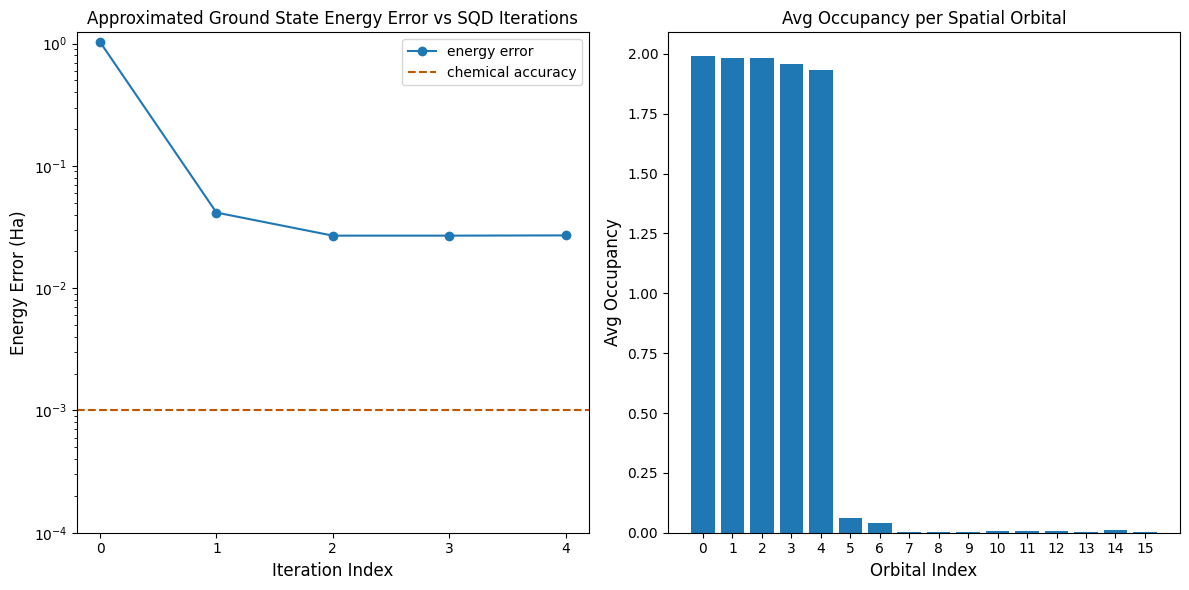

In [7]:
import matplotlib.pyplot as plt

# Chemical accuracy (+/- 1 milli-Hartree)
chem_accuracy = 0.001
exact_energy = -109.04667

# Data for energies plot
x1 = range(ITERATIONS)
min_e = [np.min(e) for e in energy_hist]
e_diff = [abs(e - exact_energy) for e in min_e]
yt1 = [1.0, 1e-1, 1e-2, 1e-3, 1e-4]

# Data for avg spatial orbital occupancy
y2 = occupancy_hist[-1][0] + occupancy_hist[-1][1]
x2 = range(len(y2))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot energies
axs[0].plot(x1, e_diff, label="energy error", marker="o")
axs[0].set_xticks(x1)
axs[0].set_xticklabels(x1)
axs[0].set_yticks(yt1)
axs[0].set_yticklabels(yt1)
axs[0].set_yscale("log")
axs[0].set_ylim(1e-4)
axs[0].axhline(y=chem_accuracy, color="#BF5700", linestyle="--", label="chemical accuracy")
axs[0].set_title("Approximated Ground State Energy Error vs SQD Iterations")
axs[0].set_xlabel("Iteration Index", fontdict={"fontsize": 12})
axs[0].set_ylabel("Energy Error (Ha)", fontdict={"fontsize": 12})
axs[0].legend()

# Plot orbital occupancy
axs[1].bar(x2, y2, width=0.8)
axs[1].set_xticks(x2)
axs[1].set_xticklabels(x2)
axs[1].set_title("Avg Occupancy per Spatial Orbital")
axs[1].set_xlabel("Orbital Index", fontdict={"fontsize": 12})
axs[1].set_ylabel("Avg Occupancy", fontdict={"fontsize": 12})

print(f"Exact energy: {exact_energy:.5f} Ha")
print(f"SQD energy: {min_e[-1]:.5f} Ha")
print(f"Absolute error: {e_diff[-1]:.5f} Ha")
plt.tight_layout()
plt.show()

## Next steps

<Admonition type="tip" title="Recommendations">
    - Read through the [SQD tutorial](https://learning.quantum.ibm.com/tutorial/improving-energy-estimation-of-a-fermionic-hamiltonian-with-sqd) on IBM Quantum Learning
</Admonition>